# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
from google.colab import drive
drive.mount('/content/drive')

# Try loading one file
file_path = '/content/drive/MyDrive/Colab Notebooks/EDA_Assignment_NYC Yellow Taxi_DSC77/Datasets and Dictionary/trip_records/2023-1.parquet'  # Replace 'your_folder' with the actual folder name

df0 = pd.read_parquet(file_path)
df0.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [5]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload
sample_data= pd.DataFrame()

In [6]:
# Import required libraries
import os
import pandas as pd
from tqdm import tqdm  # For progress bar

# Check if sampled data file exists
sampled_data_file = 'nyc_taxi_2023_sample.parquet'
if os.path.exists(sampled_data_file):
    # Load data from existing file
    df = pd.read_parquet(sampled_data_file)
    print("Loaded data from existing sampled file.")
else:

  # Set the folder path containing data files
  os.chdir('/content/drive/MyDrive/Colab Notebooks/EDA_Assignment_NYC Yellow Taxi_DSC77/Datasets and Dictionary/trip_records')

  # Create a list of all the twelve files to read
  file_list = os.listdir()

  # Initialize an empty list to store sampled data from all months
  all_sampled_data = []

  # Iterate through the list of files and sample one by one
  for file_name in tqdm(file_list, desc="Processing files"):
      try:
          # File path for the current file
          file_path = os.path.join(os.getcwd(), file_name)

          # Read the current file
          df_filename = pd.read_parquet(file_path)

          # Ensure the 'tpep_pickup_datetime' and 'tpep_dropoff_datetime' columns are in datetime format
          df_filename['tpep_pickup_datetime'] = pd.to_datetime(df_filename['tpep_pickup_datetime'])
          df_filename['tpep_dropoff_datetime'] = pd.to_datetime(df_filename['tpep_dropoff_datetime'])

          # Filter to keep only 2023 data (pickup and dropoff dates in 2023)
          df_filename = df_filename[
              (df_filename['tpep_pickup_datetime'].dt.year == 2023) &
              (df_filename['tpep_dropoff_datetime'].dt.year == 2023)
          ]

          # Skip to next file if no 2023 data remains
          if df_filename.empty:
              continue

          # Extract date and hour into separate columns for grouping
          df_filename['pickup_date'] = df_filename['tpep_pickup_datetime'].dt.date
          df_filename['pickup_hour'] = df_filename['tpep_pickup_datetime'].dt.hour

          # Group by date and hour, and sample 0.8% from each group
          sampled_data = (df_filename.groupby(['pickup_date', 'pickup_hour'], group_keys=False)
                        .apply(lambda x: x.sample(frac=0.008, random_state=42) if not x.empty else x))

          # Append the sampled data to the list
          all_sampled_data.append(sampled_data)

          # Free memory by deleting the temporary DataFrame
          del df_filename
          del sampled_data

      except Exception as e:
          print(f"Error reading file {file_name}: {e}")

  # Concatenate all sampled data into a single DataFrame
  if all_sampled_data:
      df = pd.concat(all_sampled_data, ignore_index=True)
  else:
      df = pd.DataFrame()

  # Drop temporary columns used for grouping
  df = df.drop(columns=['pickup_date', 'pickup_hour'], errors='ignore')

Processing files: 100%|██████████| 13/13 [01:35<00:00,  7.32s/it]


In [7]:
print(f"Final DataFrame shape: {df.shape}")
# Verify the date range to ensure only 2023 data is present
print(f"Earliest pickup datetime: {df['tpep_pickup_datetime'].min()}")
print(f"Latest pickup datetime: {df['tpep_pickup_datetime'].max()}")

Final DataFrame shape: (303835, 20)
Earliest pickup datetime: 2023-01-01 00:04:34
Latest pickup datetime: 2023-12-31 23:48:25


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [9]:
# Store the df in csv/parquet
df.to_parquet('nyc_taxi_2023_sample.parquet', index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Load the new data file
df = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/EDA_Assignment_NYC Yellow Taxi_DSC77/Datasets and Dictionary/trip_records/nyc_taxi_2023_sample.parquet')
df.shape

(303835, 20)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303835 entries, 0 to 303834
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               303835 non-null  int64         
 1   tpep_pickup_datetime   303835 non-null  datetime64[us]
 2   tpep_dropoff_datetime  303835 non-null  datetime64[us]
 3   passenger_count        293630 non-null  float64       
 4   trip_distance          303835 non-null  float64       
 5   RatecodeID             293630 non-null  float64       
 6   store_and_fwd_flag     293630 non-null  object        
 7   PULocationID           303835 non-null  int64         
 8   DOLocationID           303835 non-null  int64         
 9   payment_type           303835 non-null  int64         
 10  fare_amount            303835 non-null  float64       
 11  extra                  303835 non-null  float64       
 12  mta_tax                303835 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [13]:
# Fix the index and drop any columns that are not needed

"RangeIndex: 303394 entries, 0 to 303393" indicates that the index is a default sequential integer index since it was reset during the sampling and previous concatenation process (when using pd.concat() with ignore_index=True).

In [14]:
# Drop any columns that are not needed.
df_backup = df.copy()
df = df.drop(columns=['store_and_fwd_flag','mta_tax','improvement_surcharge'])

In [15]:
df.columns # After dropping irrelevant columns, there are 17 columns (2 airport_fee) remained.

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'tip_amount',
       'tolls_amount', 'total_amount', 'congestion_surcharge', 'airport_fee',
       'Airport_fee'],
      dtype='object')

Drop any columns that are not needed:


The reason to drop columns ['VendorID','store_and_fwd_flag','mta_tax'&'improvement_surcharge'are fixed charges)] is that, based on the provided data dictionary and analysis objectives, these columns are unlikely to offer valuable insights for the business objective (optimizing taxi operations by improving service efficiency, maximizing revenue, and enhancing passenger experience).

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [16]:
# Combine the two airport fee columns
print(f"Value counts of {df['Airport_fee'].value_counts()}\n")
print(f"Number of Null values: {df['Airport_fee'].isna().sum()}")

Value counts of Airport_fee
 0.00    246267
 1.75     19210
 1.25      4376
-1.75         2
Name: count, dtype: int64

Number of Null values: 33980


In [17]:
print(f"Value counts of {df['airport_fee'].value_counts()}\n")
print(f"Number of Null values: {df['airport_fee'].isna().sum()}")

Value counts of airport_fee
0.00    21692
1.25     2083
Name: count, dtype: int64

Number of Null values: 280060


In [18]:
# Step 1: Check consistency where both columns are non-null to confirm that there are no inconsistencies between the two columns in the overlapping data.
mask = (df['airport_fee'].notnull()) & (df['Airport_fee'].notnull())
if (df.loc[mask, 'airport_fee'] == df.loc[mask, 'Airport_fee']).all():
    print("Non-null values in 'airport_fee' and 'Airport_fee' are identical where both are present.")
else:
    print("Non-null values in 'airport_fee' and 'Airport_fee' differ where both are present.")

# Step 2: Combine the columns by choosing Airport_fee due to its fewer missing values (33995<280060) and fill with 'airport_fee' where 'Airport_fee' is null.
df['Airport_fee'] = df['Airport_fee'].fillna(df['airport_fee'])

# Step 3: Handle anomalies in the combined column
# Replace unexpected values (-1.75 and 1.75) with 1.25 or 0.00 based on the data dictionary ($1.25 fee)
df['Airport_fee'] = df['Airport_fee'].replace(-1.75, 0.00)  # Assuming -1.75 is an error/refund
df['Airport_fee'] = df['Airport_fee'].replace(1.75, 1.25)   # Assuming 1.75 is a typo or undocumented change

# Step 4: Drop the duplicate 'airport_fee' column
df = df.drop(columns=['airport_fee'])

Non-null values in 'airport_fee' and 'Airport_fee' are identical where both are present.


In [19]:
# Step 5: Verify the result

print("Value counts of Airport_fee after combining and cleaning:")
print(df['Airport_fee'].value_counts(dropna=False))

Value counts of Airport_fee after combining and cleaning:
Airport_fee
0.00    267961
1.25     25669
NaN      10205
Name: count, dtype: int64


In [20]:
# This step is to filter out null data in 'Airport_fee' to look for any pattern.

null_airportfee = df[df.Airport_fee.isna()]
null_airportfee

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,Airport_fee
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,66,107,0,25.64,0.0,5.93,0.00,35.57,NaN,NaN
15,2,2023-01-01 00:41:50,2023-01-01 01:14:50,NaN,10.77,NaN,151,106,0,45.38,0.0,11.19,6.55,67.12,NaN,NaN
45,2,2023-01-01 01:46:00,2023-01-01 02:15:00,NaN,4.97,NaN,50,226,0,27.62,0.0,6.32,0.00,37.94,NaN,NaN
46,2,2023-01-01 01:10:00,2023-01-01 01:41:00,NaN,5.73,NaN,186,255,0,27.32,0.0,6.26,0.00,37.58,NaN,NaN
61,2,2023-01-01 01:18:30,2023-01-01 01:46:19,NaN,2.98,NaN,137,48,0,27.54,0.0,3.15,0.00,34.69,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303801,2,2023-12-13 22:21:46,2023-12-13 22:30:27,NaN,2.09,NaN,142,238,0,18.60,0.0,0.00,0.00,22.60,NaN,NaN
303809,1,2023-12-14 22:45:21,2023-12-14 22:56:20,NaN,0.00,NaN,263,238,0,24.93,0.0,0.00,0.00,28.93,NaN,NaN
303823,2,2023-12-19 15:26:35,2023-12-19 15:38:48,NaN,1.25,NaN,114,234,0,12.90,0.0,0.00,0.00,16.90,NaN,NaN
303832,2,2023-12-22 15:10:53,2023-12-22 16:26:57,NaN,14.78,NaN,148,132,0,77.66,0.0,16.33,0.00,97.99,NaN,NaN


In [21]:
print(f'Unique values of payment_type: {null_airportfee["payment_type"].unique()}\n')
print(f'Unique values of passenger_count: {null_airportfee["passenger_count"].unique()}\n')
print(f'Unique values of RatecodeID: {null_airportfee["RatecodeID"].unique()}\n')
print(f'Unique values of congestion_surcharge: {null_airportfee["congestion_surcharge"].unique()}\n')

Unique values of payment_type: [0]

Unique values of passenger_count: [nan]

Unique values of RatecodeID: [nan]

Unique values of congestion_surcharge: [nan]



Observations from data with null values in 'Airport_fee':


*   Flex Fare trips are a special type of taxi service where the fare is not
determined by the meter but is negotiated between the passenger and the driver.
*   Hence, due to the nature of Flex Fare trips, the entire values (10 184) of some columns are null too, such as 'passenger_count' (drivers no need to enter as in metered trips), 'RatecodeID' (which indicates the fare type) and 'congestion_surcharge' (which indicates the fare type).
*   Given this understanding, it's clear that the missing values are not random (MNAR) but are systematically related to Flex Fare trips.
So for this group will be exclude from the dataset and keep them seperate for further analysis if any.

In [22]:
# Create a separate DataFrame for Flex Fare trips
flex_fare_trips = df[df['payment_type'] == 0].copy()

# Exclude Flex Fare trips from the main DataFrame
df = df[df['payment_type'] != 0]

# Verify the changes
print("Shape of dataFrame after excluding Flex Fare trips:", df.shape)
print("Shape of 'Flex Fare trips' DataFrame:", flex_fare_trips.shape)

Shape of dataFrame after excluding Flex Fare trips: (293630, 16)
Shape of 'Flex Fare trips' DataFrame: (10205, 16)


In [23]:
df.info() # there is NO missing values (Nan value) in the dataframe after excluding flex fare trips.

<class 'pandas.core.frame.DataFrame'>
Index: 293630 entries, 0 to 303834
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               293630 non-null  int64         
 1   tpep_pickup_datetime   293630 non-null  datetime64[us]
 2   tpep_dropoff_datetime  293630 non-null  datetime64[us]
 3   passenger_count        293630 non-null  float64       
 4   trip_distance          293630 non-null  float64       
 5   RatecodeID             293630 non-null  float64       
 6   PULocationID           293630 non-null  int64         
 7   DOLocationID           293630 non-null  int64         
 8   payment_type           293630 non-null  int64         
 9   fare_amount            293630 non-null  float64       
 10  extra                  293630 non-null  float64       
 11  tip_amount             293630 non-null  float64       
 12  tolls_amount           293630 non-null  float64  

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [24]:
# check where values of fare amount are negative
print(df[df['fare_amount']<0])
# 'fare_amount' column has no negative value.

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, tip_amount, tolls_amount, total_amount, congestion_surcharge, Airport_fee]
Index: []


In [25]:
# check where monetary values are negative
monetary_columns = ['fare_amount', 'extra', 'tip_amount', 'tolls_amount', 'total_amount',
                    'congestion_surcharge'] #'Airport_fee' column has already been solved above.

for col in monetary_columns:
    negative_count = (df[col] < 0).sum()
    if negative_count > 0:
        print(f"- Column '{col}' has {negative_count} negative values.")
        print(f"Negative values in '{col}':")
        print(df[df[col] < 0][col].value_counts(),'\n')
    else:
        print(f"- Column '{col}' has NO negative values.",'\n')

- Column 'fare_amount' has NO negative values. 

- Column 'extra' has 1 negative values.
Negative values in 'extra':
extra
-2.5    1
Name: count, dtype: int64 

- Column 'tip_amount' has NO negative values. 

- Column 'tolls_amount' has NO negative values. 

- Column 'total_amount' has 11 negative values.
Negative values in 'total_amount':
total_amount
-4.00    6
-1.50    3
-3.25    2
Name: count, dtype: int64 

- Column 'congestion_surcharge' has 6 negative values.
Negative values in 'congestion_surcharge':
congestion_surcharge
-2.5    6
Name: count, dtype: int64 



Did you notice something different in the `RatecodeID` column for above records?

In [26]:
# RatecodeID  = The final rate code in effect at the end of the trip.
# 1= Standard rate
# 2=JFKb
# 3=Newark
# 4=Nassau or Westchester
# 5=Negotiated fare
# 6=Group ride

In [27]:
print(df['RatecodeID'].value_counts(),'\n')
print(df[df['RatecodeID'] == 99.0]['RatecodeID'].value_counts()/len(df)*100)

RatecodeID
1.0     277236
2.0      11467
99.0      1725
5.0       1657
3.0        964
4.0        581
Name: count, dtype: int64 

RatecodeID
99.0    0.587474
Name: count, dtype: float64


In [28]:
# DataFrame for trips with unknown RatecodeID
unknown_ratecodeID = df[df['RatecodeID'] == 99.0]
print(unknown_ratecodeID.describe())

          VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1725.000000                        1725                        1725   
mean      1.000580  2023-07-12 20:51:09.084637  2023-07-12 21:31:20.328695   
min       1.000000         2023-01-01 11:39:40         2023-01-01 11:55:59   
25%       1.000000         2023-04-11 16:54:35         2023-04-11 18:22:58   
50%       1.000000         2023-07-16 09:40:45         2023-07-16 10:11:19   
75%       1.000000         2023-10-16 11:28:44         2023-10-16 12:10:57   
max       2.000000         2023-12-30 16:41:28         2023-12-30 16:49:25   
std       0.024077                         NaN                         NaN   

       passenger_count  trip_distance  RatecodeID  PULocationID  DOLocationID  \
count      1725.000000    1725.000000      1725.0   1725.000000   1725.000000   
mean          1.001739       6.627072        99.0    127.615072    129.802319   
min           0.000000       0.000000        99.0     

In [29]:
# DataFrame for trips with known RatecodeID
known_ratecodeID = df[df['RatecodeID'] != 99.0]
print(known_ratecodeID.describe())

            VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  291905.000000                      291905                      291905   
mean        1.741488  2023-07-01 20:44:12.502512  2023-07-01 21:01:19.729326   
min         1.000000         2023-01-01 00:04:34         2023-01-01 00:09:40   
25%         1.000000         2023-04-01 20:33:56         2023-04-01 20:52:09   
50%         2.000000         2023-06-26 01:58:43         2023-06-26 02:11:32   
75%         2.000000         2023-10-05 19:19:59         2023-10-05 19:37:20   
max         2.000000         2023-12-31 23:48:25         2023-12-31 23:54:00   
std         0.437818                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    291905.000000  291905.000000  291905.000000  291905.000000   
mean          1.369117       3.416925       1.074565     165.631558   
min           0.000000       0.000000       1.000000       1.00000

In [30]:
# Descriptive statistics of moneytary columns for unknown RatecodeID trips
print(unknown_ratecodeID[['trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount', 'total_amount','payment_type']].describe())
print('\n')
# Descriptive statistics for known RatecodeID trips
print(known_ratecodeID[['trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount', 'total_amount','payment_type']].describe())

       trip_distance  fare_amount   tip_amount  tolls_amount  total_amount  \
count    1725.000000  1725.000000  1725.000000   1725.000000   1725.000000   
mean        6.627072    33.272638     0.002307      1.578226     36.348823   
std         5.790448    15.147677     0.095827      3.535382     17.085516   
min         0.000000     0.000000     0.000000      0.000000      0.000000   
25%         1.800000    21.500000     0.000000      0.000000     23.000000   
50%         5.200000    30.500000     0.000000      0.000000     33.000000   
75%        10.600000    42.500000     0.000000      0.000000     46.000000   
max        35.400000   200.000000     3.980000     33.560000    200.000000   

       payment_type  
count   1725.000000  
mean       1.001159  
std        0.034040  
min        1.000000  
25%        1.000000  
50%        1.000000  
75%        1.000000  
max        2.000000  


       trip_distance    fare_amount     tip_amount   tolls_amount  \
count  291905.000000  291905

In [31]:
unknown_ratecodeID[(unknown_ratecodeID['passenger_count'] == 0) & ((unknown_ratecodeID['fare_amount'] > 0) | (unknown_ratecodeID['trip_distance'] > 0))]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,Airport_fee
35155,1,2023-03-13 11:51:38,2023-03-13 11:51:38,0.0,0.0,99.0,264,264,1,200.0,0.0,0.0,0.0,200.0,0.0,0.0
118068,1,2023-02-23 08:57:03,2023-02-23 08:57:03,0.0,0.0,99.0,264,264,1,19.0,0.0,0.0,0.0,19.0,0.0,0.0
175198,1,2023-05-30 06:02:05,2023-05-30 06:02:05,0.0,0.0,99.0,264,264,1,94.0,0.0,0.0,0.0,94.0,0.0,0.0
210871,1,2023-09-14 10:08:44,2023-09-14 10:08:44,0.0,0.0,99.0,264,264,1,200.0,0.0,0.0,0.0,200.0,0.0,0.0


In [32]:
##
df[ (df['passenger_count'] == 0) & (df['trip_distance'] == 0) & (df['tpep_pickup_datetime'] == df['tpep_dropoff_datetime'])]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,Airport_fee
35155,1,2023-03-13 11:51:38,2023-03-13 11:51:38,0.0,0.0,99.0,264,264,1,200.0,0.0,0.0,0.0,200.0,0.0,0.0
92817,1,2023-08-22 04:50:08,2023-08-22 04:50:08,0.0,0.0,5.0,100,264,2,49.0,0.0,0.0,0.0,49.0,0.0,0.0
118068,1,2023-02-23 08:57:03,2023-02-23 08:57:03,0.0,0.0,99.0,264,264,1,19.0,0.0,0.0,0.0,19.0,0.0,0.0
175198,1,2023-05-30 06:02:05,2023-05-30 06:02:05,0.0,0.0,99.0,264,264,1,94.0,0.0,0.0,0.0,94.0,0.0,0.0
210871,1,2023-09-14 10:08:44,2023-09-14 10:08:44,0.0,0.0,99.0,264,264,1,200.0,0.0,0.0,0.0,200.0,0.0,0.0
243218,1,2023-10-24 12:47:01,2023-10-24 12:47:01,0.0,0.0,1.0,145,264,2,3.0,0.0,0.0,0.0,4.0,0.0,0.0


These rows have the same pickup and dropoff time, zero trip_distance but they have total_amount and payment type of 1(credit card). So these characteristics can represent for canceled trip and potential refunds for customers, invalid data or system errors. They should be kept for the business analysis objectives relating to revenues and customer experience.

***AI: These trip inconsistencies (zero distance, same pickup/dropoff times, yet non-zero charges) likely indicate invalid data or system errors, potentially representing canceled trips with customer charges. Retaining these records is crucial for analyzing potential revenue loss and identifying opportunities to improve customer experience through proactive refunds. However, further investigation is needed to verify the legitimacy of these charges. This insight about refunds and customer experience is relevant for the whole dataset, as similar issues may exist elsewhere."


***Reason: The 0.6% size is small, but these rows contain valid trip data (positive fares, distances, payment types), making them relevant to your business objectives. Imputing a valid RatecodeID preserves this data, avoiding the loss of $57,404.25 in potential revenue and operational/passenger insights. Business Alignment: Revenue: Retains revenue data for analysis. Efficiency: Keeps trip data for operational insights. Passenger Experience: Preserves passenger trip records.

In [33]:
unknown_ratecodeID[(unknown_ratecodeID['trip_distance'] == 0)& (unknown_ratecodeID['total_amount'] == 0)]
# this trip with same pickup and dropoff time, zero in trip_distance and fare amount highly due to canceled trip.
df[(df.tpep_pickup_datetime==df.tpep_dropoff_datetime) & (df['trip_distance'] == 0)& (df['total_amount'] == 0)]
# In comparison with entries having these same features in the whole data to impute their proper mode RatecodeID which is 5.0
df[df.index == 99960]['RatecodeID']
df.loc[99960, 'RatecodeID'] = 5.0

In [34]:
# Preserve rows with RatecodeID 99.0 by creating new DataFrame.
unknown_ratecodeID = df[df['RatecodeID'] == 99.0].copy()

#Impute unknown RatecodeID with mode.
df['RatecodeID'] = df['RatecodeID'].replace(99.0, df[df['RatecodeID'] != 99.0]['RatecodeID'].mode()[0])
df['RatecodeID'].value_counts()

,count
RatecodeID,
1.0,278960
2.0,11467
5.0,1658
3.0,964
4.0,581


In [35]:
# Find which columns have negative values
monetary_columns = ['fare_amount', 'extra', 'tip_amount', 'tolls_amount', 'total_amount','congestion_surcharge'] #'Airport_fee' column has already been solved.
negative_rows = df[np.any(df[monetary_columns] < 0, axis=1)].copy() #seperate negative moneytary values in case to investigate further.

# add column named trip_duration to see pattern of time in negative values.
negative_rows['trip_duration'] = negative_rows['tpep_dropoff_datetime'] - negative_rows['tpep_pickup_datetime']

negative_rows

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,Airport_fee,trip_duration
30861,2,2023-03-08 15:51:33,2023-03-08 15:52:12,1.0,0.00,1.0,231,231,2,0.0,0.0,0.0,0.0,-1.50,0.0,0.0,0 days 00:00:39
72837,2,2023-06-25 05:59:41,2023-06-25 06:08:22,2.0,1.09,2.0,90,170,2,0.0,0.0,0.0,0.0,-4.00,-2.5,0.0,0 days 00:08:41
77424,2,2023-06-30 21:37:09,2023-06-30 21:46:00,2.0,1.38,2.0,249,186,2,0.0,0.0,0.0,0.0,-4.00,-2.5,0.0,0 days 00:08:51
78728,2,2023-08-02 16:04:37,2023-08-02 16:04:44,2.0,0.01,2.0,237,237,2,0.0,0.0,0.0,0.0,-4.00,-2.5,0.0,0 days 00:00:07
132625,2,2023-04-12 19:12:27,2023-04-12 19:37:09,1.0,3.61,1.0,68,232,2,0.0,0.0,0.0,0.0,-4.00,-2.5,0.0,0 days 00:24:42
156775,2,2023-05-09 17:05:56,2023-05-09 17:24:59,1.0,8.35,1.0,132,222,2,0.0,0.0,0.0,0.0,-3.25,0.0,0.0,0 days 00:19:03
166356,2,2023-05-19 14:53:56,2023-05-19 14:54:03,1.0,0.00,1.0,193,193,2,0.0,0.0,0.0,0.0,-1.50,0.0,0.0,0 days 00:00:07
246227,2,2023-10-27 14:51:03,2023-10-27 14:51:11,1.0,0.00,1.0,265,265,2,3.0,-2.5,0.0,0.0,4.00,0.0,0.0,0 days 00:00:08
252787,2,2023-11-03 15:51:42,2023-11-03 15:53:00,1.0,0.21,2.0,246,246,2,0.0,0.0,0.0,0.0,-4.00,-2.5,0.0,0 days 00:01:18
255769,2,2023-11-06 19:30:44,2023-11-06 19:38:21,1.0,0.48,1.0,75,75,2,0.0,0.0,0.0,0.0,-1.50,0.0,0.0,0 days 00:07:37


There are only 12 rows with negative moneytary values mostly total_amount. These trip are all paid in cash (payment_type = 2) and mostly have nearly zero in trip_distance and trip_duration. This is much likely to be canceled trips or error of system, so these rows can be dropped to ensure data intergrity.

In [36]:
# Handling with negative values in moneytary columns.
df.drop(negative_rows.index, inplace=True)
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293618 entries, 0 to 293617
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               293618 non-null  int64         
 1   tpep_pickup_datetime   293618 non-null  datetime64[us]
 2   tpep_dropoff_datetime  293618 non-null  datetime64[us]
 3   passenger_count        293618 non-null  float64       
 4   trip_distance          293618 non-null  float64       
 5   RatecodeID             293618 non-null  float64       
 6   PULocationID           293618 non-null  int64         
 7   DOLocationID           293618 non-null  int64         
 8   payment_type           293618 non-null  int64         
 9   fare_amount            293618 non-null  float64       
 10  extra                  293618 non-null  float64       
 11  tip_amount             293618 non-null  float64       
 12  tolls_amount           293618 non-null  floa

In [37]:
df['trip_duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [38]:
# Find the proportion of missing values in each column
df.isna().sum()/df.shape[0]*100

,0
VendorID,0.0
tpep_pickup_datetime,0.0
tpep_dropoff_datetime,0.0
passenger_count,0.0
trip_distance,0.0
RatecodeID,0.0
PULocationID,0.0
DOLocationID,0.0
payment_type,0.0
fare_amount,0.0


There is no null values at this stage because all null values are handled in the previous step of fixing '**Airport_fee'** column.

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [39]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'

Did you find zeroes in passenger_count? Handle these.

In [40]:
df.passenger_count.value_counts()

,count
passenger_count,
1.0,221368
2.0,44145
3.0,11020
4.0,6069
0.0,4659
5.0,3780
6.0,2572
7.0,2
8.0,2


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [41]:
# Fix missing values in 'RatecodeID'

There were 1725 '99.0' values in RatecodeID which are described as 9 = Null/unknown.

These values has already been solved by imputing with mode in handling with 'RatecodeID' above.

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [42]:
# handle null values in congestion_surcharge
df.congestion_surcharge.value_counts()


,count
congestion_surcharge,
2.5,271163
0.0,22455


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [43]:
# Handle any remaining missing values

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [44]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,Airport_fee,trip_duration
count,293618.000000,293618,293618,293618.000000,293618.000000,293618.000000,293618.000000,293618.000000,293618.000000,293618.000000,293618.000000,293618.000000,293618.000000,293618.000000,293618.000000,293618.000000,293618
mean,1.737124,2023-07-01 22:15:12.668729,2023-07-01 22:32:28.053487,1.366963,3.435872,1.074127,165.407901,164.193609,1.205171,20.206542,1.635580,3.572078,0.590224,29.322520,2.308808,0.109279,0 days 00:17:15.384758
min,1.000000,2023-01-01 00:04:34,2023-01-01 00:09:40,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1 days +23:07:15
25%,1.000000,2023-04-01 21:27:36.500000,2023-04-01 21:40:53.250000,1.000000,1.060000,1.000000,132.000000,113.000000,1.000000,9.300000,0.000000,1.000000,0.000000,15.960000,2.500000,0.000000,0 days 00:07:36
50%,2.000000,2023-06-26 08:38:02,2023-06-26 08:51:34,1.000000,1.790000,1.000000,162.000000,162.000000,1.000000,13.500000,1.000000,2.860000,0.000000,21.000000,2.500000,0.000000,0 days 00:12:33
75%,2.000000,2023-10-05 20:08:59.250000,2023-10-05 20:26:53,1.000000,3.360000,1.000000,234.000000,234.000000,1.000000,21.900000,2.500000,4.450000,0.000000,30.620000,2.500000,0.000000,0 days 00:20:27
max,2.000000,2023-12-31 23:48:25,2023-12-31 23:54:00,9.000000,187.350000,5.000000,265.000000,265.000000,4.000000,143163.450000,14.250000,150.290000,143.000000,143167.450000,2.500000,1.250000,3 days 18:11:00
std,0.440196,NaN,NaN,0.890776,4.522911,0.393488,63.742223,69.747827,0.466129,264.799799,1.830328,4.063058,2.170538,265.147058,0.664400,0.353068,0 days 00:40:16.471960


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [45]:
# remove passenger_count > 6
df = df[~(df.passenger_count>6)]
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,Airport_fee,trip_duration
count,293613.000000,293613,293613,293613.000000,293613.000000,293613.000000,293613.000000,293613.000000,293613.000000,293613.000000,293613.000000,293613.000000,293613.000000,293613.000000,293613.000000,293613.000000,293613
mean,1.737120,2023-07-01 22:15:18.512715,2023-07-01 22:32:33.895301,1.366854,3.435765,1.074060,165.408316,164.193459,1.205175,20.205456,1.635608,3.572026,0.590073,29.321277,2.308830,0.109281,0 days 00:17:15.382585
min,1.000000,2023-01-01 00:04:34,2023-01-01 00:09:40,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1 days +23:07:15
25%,1.000000,2023-04-01 21:27:19,2023-04-01 21:40:25,1.000000,1.060000,1.000000,132.000000,113.000000,1.000000,9.300000,0.000000,1.000000,0.000000,15.960000,2.500000,0.000000,0 days 00:07:36
50%,2.000000,2023-06-26 08:39:12,2023-06-26 08:52:00,1.000000,1.790000,1.000000,162.000000,162.000000,1.000000,13.500000,1.000000,2.860000,0.000000,21.000000,2.500000,0.000000,0 days 00:12:33
75%,2.000000,2023-10-05 20:09:18,2023-10-05 20:27:01,1.000000,3.360000,1.000000,234.000000,234.000000,1.000000,21.900000,2.500000,4.450000,0.000000,30.620000,2.500000,0.000000,0 days 00:20:27
max,2.000000,2023-12-31 23:48:25,2023-12-31 23:54:00,6.000000,187.350000,5.000000,265.000000,265.000000,4.000000,143163.450000,14.250000,150.290000,143.000000,143167.450000,2.500000,1.250000,3 days 18:11:00
std,0.440199,NaN,NaN,0.890383,4.522568,0.393158,63.741972,69.747211,0.466132,264.801921,1.830331,4.062976,2.169975,265.149135,0.664365,0.353071,0 days 00:40:16.485006


In [46]:
# Continue with outlier handling:
## 1. Trip_duration
## 2. Trip_distance
## 3. Trip_distance vs. Fare_amount
## 4. Trip_distance vs. Fare_amount vs. LocationID
## 5. Fare_amount

In [47]:
## 1. Trip_duration:
df['trip_duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['trip_duration'] = pd.to_timedelta(df['trip_duration'])

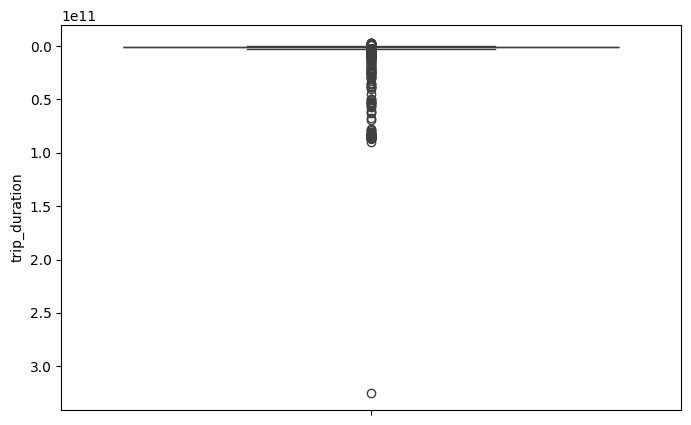

In [48]:
plt.figure(figsize=(8,5))
sns.boxplot(df.trip_duration)
plt.show()

In [49]:
df[df.trip_duration > pd.Timedelta(days=1)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,Airport_fee,trip_duration
168401,2,2023-05-26 20:54:21,2023-05-27 21:54:10,1.0,2.29,1.0,181,132,2,14.9,1.0,0.0,0.0,17.4,0.0,0.0,1 days 00:59:49
281775,2,2023-12-15 18:29:42,2023-12-19 12:40:42,1.0,0.50,1.0,226,145,2,17.7,2.5,0.0,0.0,21.7,0.0,0.0,3 days 18:11:00


In [50]:
df =  df[~(df.trip_duration > pd.Timedelta(days=1))]

Based on the boxplot of trip_distance to filter trips exceeding one day. They are removed because their distances and fares have inconsistencies, indicating potential data errors.

In [51]:
df[df.trip_duration < pd.Timedelta(0)] #filter illogical trip_duration (negative values).

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,Airport_fee,trip_duration
192644,1,2023-07-29 11:45:00,2023-07-29 11:29:01,1.0,3.60,1.0,213,32,1,24.5,0.0,0.00,0.0,26.00,0.0,0.0,-1 days +23:44:01
246476,2,2023-11-05 01:25:30,2023-11-05 01:08:04,3.0,9.01,1.0,114,42,1,46.4,1.0,10.28,0.0,61.68,2.5,0.0,-1 days +23:42:34
246481,2,2023-11-05 01:53:23,2023-11-05 01:02:12,2.0,1.84,1.0,148,170,1,11.4,1.0,1.00,0.0,17.40,2.5,0.0,-1 days +23:08:49
246491,2,2023-11-05 01:24:15,2023-11-05 01:03:15,1.0,7.76,1.0,68,36,1,42.2,1.0,9.44,0.0,56.64,2.5,0.0,-1 days +23:39:00
246493,2,2023-11-05 01:53:24,2023-11-05 01:00:39,1.0,2.36,1.0,162,236,1,11.4,1.0,2.50,0.0,18.90,2.5,0.0,-1 days +23:07:15
246502,2,2023-11-05 01:44:38,2023-11-05 01:05:43,1.0,4.70,1.0,249,239,1,25.4,1.0,6.08,0.0,36.48,2.5,0.0,-1 days +23:21:05
246511,1,2023-11-05 01:59:01,2023-11-05 01:14:45,1.0,3.40,1.0,186,232,1,17.7,3.5,4.50,0.0,27.20,2.5,0.0,-1 days +23:15:44
246513,2,2023-11-05 01:58:09,2023-11-05 01:23:58,1.0,6.24,1.0,68,226,1,30.3,1.0,7.06,0.0,42.36,2.5,0.0,-1 days +23:25:49
246516,1,2023-11-05 01:50:53,2023-11-05 01:02:37,1.0,3.50,1.0,107,263,1,16.3,3.5,1.00,0.0,22.30,2.5,0.0,-1 days +23:11:44
246525,1,2023-11-05 01:59:30,2023-11-05 01:15:33,1.0,6.10,1.0,151,107,2,24.7,3.5,0.00,0.0,29.70,2.5,0.0,-1 days +23:16:03


These rows exhibited negative trip durations, indicating a potential error where pickup and dropoff times were swapped. To address this, the pickup and dropoff times were interchanged for these rows to ensure accurate trip duration calculations.

In [52]:
negative_duration_mask = df['trip_duration'] < pd.Timedelta(0)

# Swap pickup and dropoff times only for rows with negative durations
df.loc[negative_duration_mask, ['tpep_pickup_datetime', 'tpep_dropoff_datetime']] = df.loc[negative_duration_mask, ['tpep_dropoff_datetime', 'tpep_pickup_datetime']].values

# Recalculate trip duration after the swap
df['trip_duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

In [53]:
# Display the trip_duration for the rows where pickup and dropoff times were swapped to validate them.
swapped_rows = df[negative_duration_mask]
swapped_rows

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,Airport_fee,trip_duration
192644,1,2023-07-29 11:29:01,2023-07-29 11:45:00,1.0,3.60,1.0,213,32,1,24.5,0.0,0.00,0.0,26.00,0.0,0.0,0 days 00:15:59
246476,2,2023-11-05 01:08:04,2023-11-05 01:25:30,3.0,9.01,1.0,114,42,1,46.4,1.0,10.28,0.0,61.68,2.5,0.0,0 days 00:17:26
246481,2,2023-11-05 01:02:12,2023-11-05 01:53:23,2.0,1.84,1.0,148,170,1,11.4,1.0,1.00,0.0,17.40,2.5,0.0,0 days 00:51:11
246491,2,2023-11-05 01:03:15,2023-11-05 01:24:15,1.0,7.76,1.0,68,36,1,42.2,1.0,9.44,0.0,56.64,2.5,0.0,0 days 00:21:00
246493,2,2023-11-05 01:00:39,2023-11-05 01:53:24,1.0,2.36,1.0,162,236,1,11.4,1.0,2.50,0.0,18.90,2.5,0.0,0 days 00:52:45
246502,2,2023-11-05 01:05:43,2023-11-05 01:44:38,1.0,4.70,1.0,249,239,1,25.4,1.0,6.08,0.0,36.48,2.5,0.0,0 days 00:38:55
246511,1,2023-11-05 01:14:45,2023-11-05 01:59:01,1.0,3.40,1.0,186,232,1,17.7,3.5,4.50,0.0,27.20,2.5,0.0,0 days 00:44:16
246513,2,2023-11-05 01:23:58,2023-11-05 01:58:09,1.0,6.24,1.0,68,226,1,30.3,1.0,7.06,0.0,42.36,2.5,0.0,0 days 00:34:11
246516,1,2023-11-05 01:02:37,2023-11-05 01:50:53,1.0,3.50,1.0,107,263,1,16.3,3.5,1.00,0.0,22.30,2.5,0.0,0 days 00:48:16
246525,1,2023-11-05 01:15:33,2023-11-05 01:59:30,1.0,6.10,1.0,151,107,2,24.7,3.5,0.00,0.0,29.70,2.5,0.0,0 days 00:43:57


In [54]:
df.shape

(293611, 17)

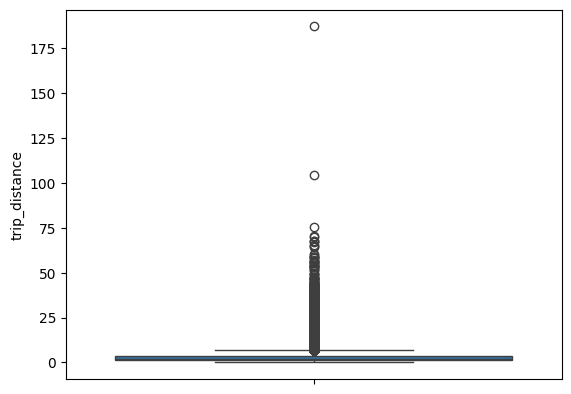

In [55]:
## 2. Trip_distance
sns.boxplot(df.trip_distance)
plt.show()

The boxplot of trip_distance showed continuous outliers, indicating a long right tail in the distribution. Instead of removing these records—which may still represent valid long trips, capping at the 99th percentile is applied.

In [56]:
np.percentile(df.trip_distance, [75, 95, 99])

array([ 3.36, 15.4 , 20.2 ])

In [57]:
cap_value = df['trip_distance'].quantile(0.99)
print(cap_value)
df['trip_distance'] = np.where(df['trip_distance'] > cap_value, cap_value, df['trip_distance'])

20.2


In [58]:
df[df.trip_distance > 20.2].shape

(0, 17)

In [59]:
## 3. Trip_distance vs. Fare_amount

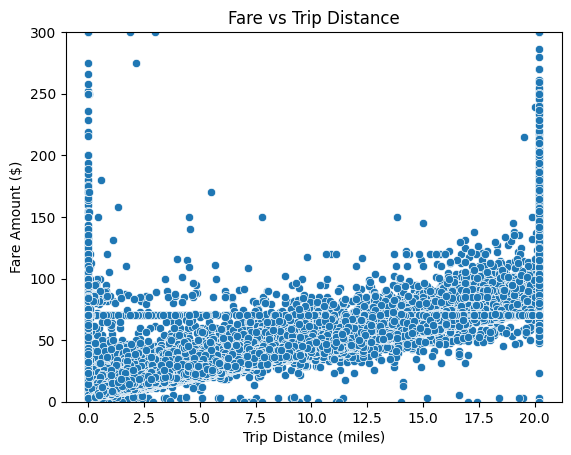

In [60]:
#visualize the relationship between the distance of a taxi trip and the fare charged and to spotting outliers if any
sns.scatterplot(data=df, x='trip_distance', y='fare_amount')
plt.ylim(0, 300)  # Adjust this value based on what range you want to focus on
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.title('Fare vs Trip Distance')
plt.show()

In [61]:
# There are outliers in relationship between trip_distance and fare_amount, such as:
# Entries where trip_distance is nearly 0 and fare_amount is more than 300
df[((df['trip_distance'] < 1) & (df['fare_amount'] > 200))].describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,Airport_fee,trip_duration
count,27.000000,27,27,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.0,27
mean,1.814815,2023-07-11 11:13:41.222222,2023-07-11 11:14:47.037037,1.259259,0.026667,4.703704,220.444444,215.925926,1.407407,5607.812963,0.185185,26.115556,1.624074,5637.441481,0.833333,0.0,0 days 00:01:05.814814
min,1.000000,2023-02-02 16:23:13,2023-02-02 16:25:32,1.000000,0.000000,1.000000,14.000000,14.000000,1.000000,216.000000,0.000000,0.000000,0.000000,251.000000,0.000000,0.0,0 days 00:00:00
25%,2.000000,2023-04-17 02:10:51,2023-04-17 02:10:57.500000,1.000000,0.000000,5.000000,212.500000,185.500000,1.000000,250.000000,0.000000,0.000000,0.000000,263.300000,0.000000,0.0,0 days 00:00:09
50%,2.000000,2023-06-29 20:56:07,2023-06-29 20:56:15,1.000000,0.000000,5.000000,265.000000,265.000000,1.000000,258.000000,0.000000,10.100000,0.000000,304.200000,0.000000,0.0,0 days 00:00:14
75%,2.000000,2023-10-17 10:31:35.500000,2023-10-17 10:34:24.500000,1.000000,0.000000,5.000000,265.000000,265.000000,1.500000,309.500000,0.000000,52.950000,0.000000,371.790000,2.500000,0.0,0 days 00:00:46.500000
max,2.000000,2023-12-30 22:38:44,2023-12-30 22:38:54,4.000000,0.700000,5.000000,265.000000,265.000000,4.000000,143163.450000,2.500000,75.880000,18.000000,143167.450000,2.500000,0.0,0 days 00:09:14
std,0.395847,NaN,NaN,0.712125,0.134622,1.067521,73.402648,77.964946,0.843949,27491.162792,0.667201,27.915057,4.751343,27486.004547,1.200961,0.0,0 days 00:02:06.513616


In [62]:
df = df[~((df['trip_distance'] < 1) & (df['fare_amount'] > 200))]

A few trips had fares over $200 but were less than 1 mile long and lasted under 10 minutes. Most of them used a special fare type called "negotiated fare" (RatecodeID 5). However, many of these trips show zero distance and only lasted a few seconds, which doesn’t make sense. These trips are likely errors or unusual cases, so they are removed to avoid affecting the analysis results.

In [63]:
df.shape

(293584, 17)

In [64]:
## 4. Trip_distance vs. Fare_amount vs. LocationID

#Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
df[(df.trip_distance == 0) & (df.fare_amount == 0) & (df.PULocationID != df.DOLocationID)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,Airport_fee,trip_duration
97280,1,2023-02-01 08:20:36,2023-02-01 08:20:36,6.0,0.0,5.0,145,264,2,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0 days 00:00:00
97640,2,2023-02-01 16:53:34,2023-02-01 16:54:13,1.0,0.0,1.0,193,7,1,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0 days 00:00:39
142907,2,2023-04-28 13:52:30,2023-04-28 14:43:03,1.0,0.0,1.0,264,255,2,0.0,0.00,0.0,0.0,5.75,2.5,1.25,0 days 00:50:33
146424,1,2023-05-02 17:42:04,2023-05-02 17:42:04,1.0,0.0,5.0,75,264,2,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0 days 00:00:00
284003,1,2023-12-18 09:31:12,2023-12-18 09:31:12,1.0,0.0,5.0,138,264,3,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0 days 00:00:00
285864,1,2023-12-20 13:40:27,2023-12-20 13:40:27,1.0,0.0,5.0,138,264,2,0.0,9.25,0.0,0.0,10.25,2.5,1.25,0 days 00:00:00
290586,1,2023-12-27 20:51:43,2023-12-27 21:00:02,3.0,0.0,5.0,132,215,4,0.0,1.75,0.0,0.0,2.75,0.0,1.25,0 days 00:08:19


These trips show no distance and no fare, but they had different pickup and dropoff zone. They were likely canceled, errors, or test rides. Because they don't reflect actual passenger service or revenue, they should be excluded from analysis related to fare, distance, or revenue patterns.

In [65]:
df = df[~(df.trip_distance == 0) & ~(df.fare_amount == 0) & (df.PULocationID != df.DOLocationID)]

In [66]:
df.shape

(276546, 17)

In [67]:
## 5. Fare_amount
df.fare_amount.describe()

,fare_amount
count,276546.000000
mean,20.001665
std,17.726788
min,0.010000
25%,9.300000
50%,14.200000
75%,21.900000
max,455.200000


0.25      9.3
0.50     14.2
0.75     21.9
0.95     70.0
0.90     42.2
0.99     74.4
1.00    455.2
Name: fare_amount, dtype: float64


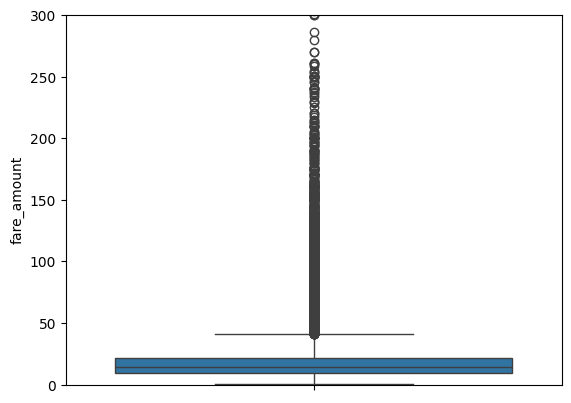

In [68]:
print(df.fare_amount.quantile([0.25, 0.5, 0.75, 0.95, 0.90, 0.99,1]))

sns.boxplot(df.fare_amount)
plt.ylim(0, 300)
plt.show()

In [69]:
df[df.fare_amount > 200].describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,Airport_fee,trip_duration
count,80.000000,80,80,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80
mean,1.850000,2023-07-16 04:52:58.187500,2023-07-16 06:29:03.612500,1.525000,20.189000,4.025000,144.125000,254.887500,1.400000,259.491250,1.153125,18.689250,10.684125,292.358375,0.218750,0.828125,0 days 01:36:05.425000
min,1.000000,2023-01-04 16:31:43,2023-01-04 17:23:10,1.000000,19.510000,1.000000,48.000000,1.000000,1.000000,200.400000,0.000000,0.000000,0.000000,209.150000,0.000000,0.000000,0 days 00:00:00
25%,2.000000,2023-04-29 07:54:48.250000,2023-04-29 10:11:03.500000,1.000000,20.200000,4.000000,132.000000,265.000000,1.000000,216.525000,0.000000,0.000000,0.000000,251.680000,0.000000,0.000000,0 days 00:55:42.750000
50%,2.000000,2023-07-29 15:03:34.500000,2023-07-29 15:48:09,1.000000,20.200000,4.000000,132.000000,265.000000,1.000000,246.950000,0.000000,0.010000,6.940000,273.295000,0.000000,1.250000,0 days 01:14:35
75%,2.000000,2023-10-02 00:00:48.500000,2023-10-02 01:22:52.250000,2.000000,20.200000,5.000000,138.000000,265.000000,2.000000,289.500000,1.875000,35.312500,19.690000,319.602500,0.000000,1.250000,0 days 01:33:24
max,2.000000,2023-12-29 08:52:14,2023-12-29 09:41:47,4.000000,20.200000,5.000000,264.000000,265.000000,4.000000,455.200000,6.750000,103.840000,43.000000,488.700000,2.500000,1.250000,0 days 12:24:28
std,0.359324,NaN,NaN,0.856472,0.079756,1.067056,31.431007,40.073033,0.756407,53.761508,1.640804,25.999492,10.715735,63.010404,0.710873,0.594800,0 days 01:37:52.741377


In [70]:
# Do any columns need standardising?
df.shape

(276546, 17)

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [71]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'tip_amount',
 'tolls_amount',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'trip_duration']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Datetime
* `tpep_dropoff_datetime`: Datetime
* `passenger_count`: Discrete Numerical
* `trip_distance`: Continuous Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Numerical
* `trip_duration`: Continuous Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?

* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

These are numerical and represent quantities. So they can be used to perform statistical analysis to understand distribution, variability, identify typical behaviors, spot outliers, and uncover relationships within the NYC taxi trip data.


##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

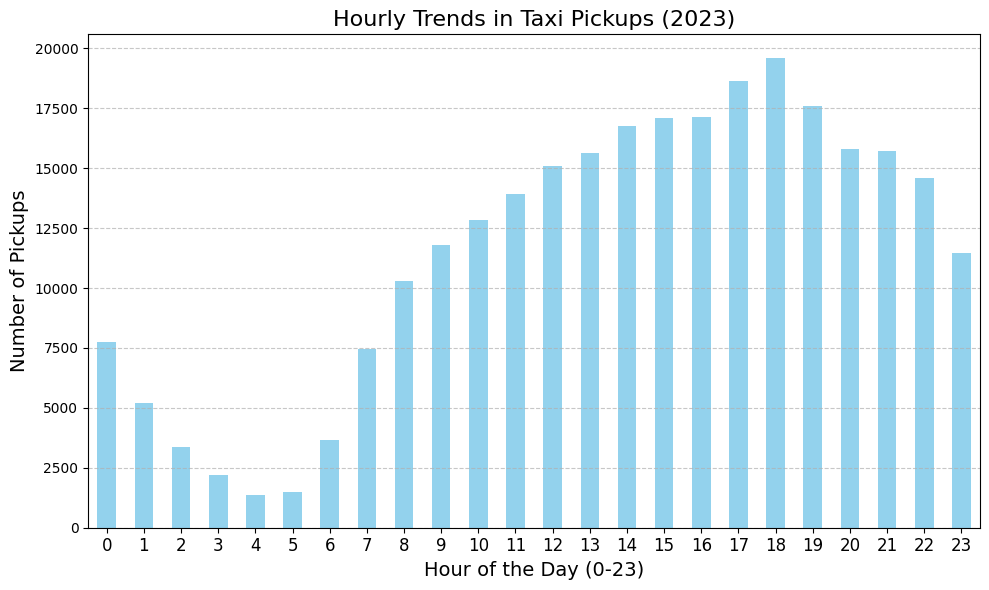

In [72]:
# Find and show the hourly trends in taxi pickups
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
hourly_pickups = df['pickup_hour'].value_counts().sort_index()

plt.figure(figsize= (10,6))
hourly_pickups.plot(kind='bar', color='skyblue', alpha=0.9)
plt.title('Hourly Trends in Taxi Pickups (2023)', fontsize=16)
plt.xlabel('Hour of the Day (0-23)', fontsize=14)
plt.ylabel('Number of Pickups', fontsize=14)
plt.xticks(ticks=range(24), labels=[str(i) for i in range(24)], rotation=0, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Summary of trend:

- A sharp drop in activity after midnight, reaching a minimum in the very early morning (around 4 AM).
- A rapid increase starting around 6 AM for the morning rush.
Sustained high demand throughout the daytime.
- A pronounced peak in the early evening (5 PM - 7 PM), which are the busiest hours overall.
- Strong activity continuing into the late evening, before tapering off after midnight.

This pattern is typical for urban transportation, reflecting work commutes, daytime business/leisure activities, and evening social engagements. The specific peak times and the volume of pickups at different hours provide valuable insights into the operational demand on the taxi system in NYC.

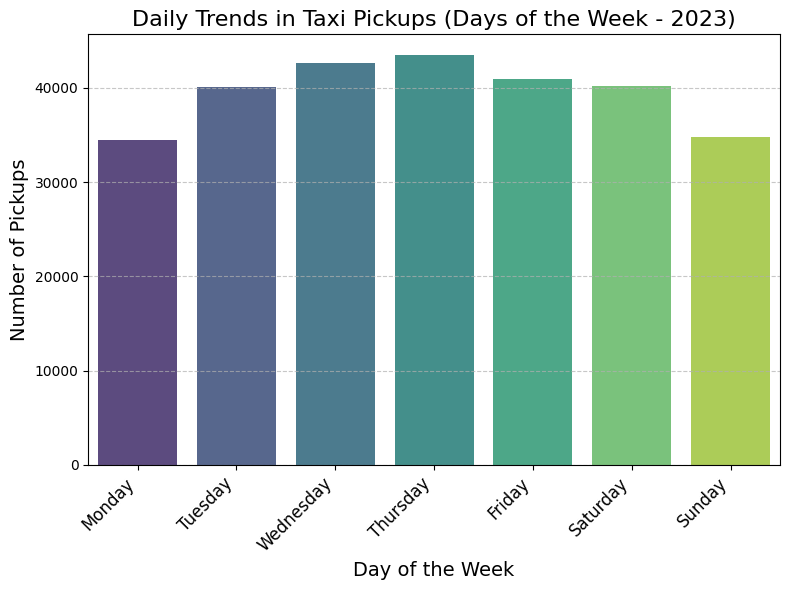

In [73]:
# Show the daily trends in pickups
df['pickup_day_name'] = df['tpep_pickup_datetime'].dt.day_name()

# Calculate the number of pickups for each day of the week
daily_pickups = df['pickup_day_name'].value_counts()

# Define the desired order for the days of the week for plotting
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex the Series to ensure the correct order and include all days (even if some had 0 pickups)
daily_pickups = daily_pickups.reindex(day_order, fill_value=0)

plt.figure(figsize=(8,6)) # Adjust figure size as needed
sns.barplot(x=daily_pickups.index, y=daily_pickups.values, palette='viridis', alpha=0.9)
plt.title('Daily Trends in Taxi Pickups (Days of the Week - 2023)', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Pickups', fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Summary of Trend:
- The week starts with its lowest taxi demand on Monday.
- Demand progressively increases through Tuesday and Wednesday.
- The peak period for taxi pickups appears to be concentrated around Wednesday and Thursday, with Thursday showing the highest numbers.
- Friday and Saturday remain very busy, nearly matching the midweek peak, indicating strong activity likely related to work, social, and leisure engagements.
- Sunday marks a significant decrease in activity compared to the preceding busy days, transitioning into the quietest day, Monday.

This pattern suggests a strong work-week influence, with demand building up from Monday and peaking mid-to-late week (Wednesday/Thursday). The sustained high activity on Friday and Saturday reflects typical weekend social and leisure patterns. The dip on Sunday could be due to a quieter end to the weekend before the start of the new work week. (****put in report)

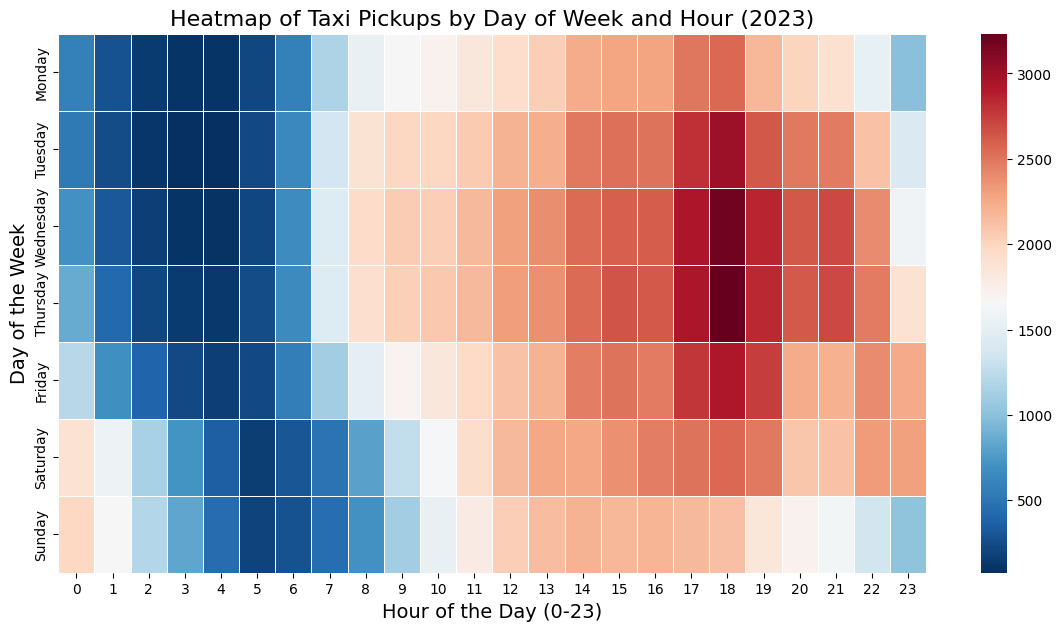

In [74]:
# Combine Dayname with Hourly to visulize in heatmap to see correlation.

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['pickup_day_name'] = pd.Categorical(df['pickup_day_name'], categories=day_order, ordered=True)

# Group by day of the week and hour, then count pickups
# Then unstack 'pickup_hour' to make hours as columns, and reindex to ensure all hours 0-23 are present
hourly_daily_pickups = df.groupby(['pickup_day_name', 'pickup_hour']).size().unstack(fill_value=0)

# Ensure all hours (0-23) are present as columns, filling missing ones with 0
all_hours = range(24)
hourly_daily_pickups = hourly_daily_pickups.reindex(columns=all_hours, fill_value=0)

# Visualize
plt.figure(figsize=(14,7))
sns.heatmap(hourly_daily_pickups, cmap="RdBu_r",linewidths=.5)
plt.title('Heatmap of Taxi Pickups by Day of Week and Hour (2023)', fontsize=16)
plt.xlabel('Hour of the Day (0-23)', fontsize=14)
plt.ylabel('Day of the Week', fontsize=14)
plt.show()

This heatmap visually confirms your previous findings from the individual hourly and daily bar charts.
Sunday and Monday are the quietest days overall, especially in the morning.
Thursday (and Wednesday) appear as the overall busiest days, particularly strong throughout the afternoon and into the evening peak.
Friday and Saturday show high activity, especially in the evenings and nights.
Sunday is a day of moderate activity, tapering off in the evening.

Note of Late Night on Friday/Saturday:

Hour 0 (midnight) on Saturday (meaning very early Saturday morning, end of Friday night) and Sunday (end of Saturday night) shows relatively strong activity (orange/red), which is more intense than Sunday-Thursday at midnight.

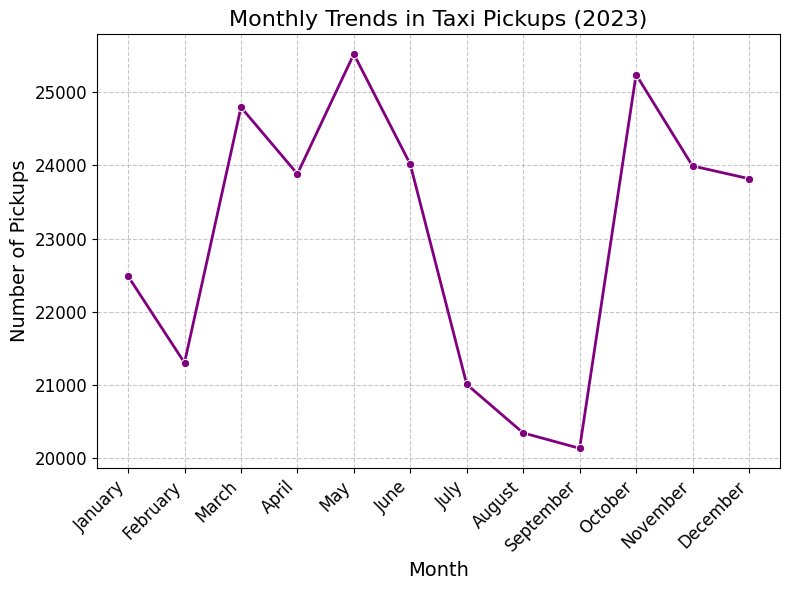

In [75]:
# Show the monthly trends in pickups
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month_name()

month_name_order = ['January', 'February', 'March', 'April', 'May', 'June',
                    'July', 'August', 'September', 'October', 'November', 'December']
monthly_pickups = df.groupby('pickup_month').size().reindex(month_name_order, fill_value=0)

plt.figure(figsize=(8,6))
sns.lineplot(x=monthly_pickups.index, y=monthly_pickups.values, marker='o', color='purple', linewidth=2, sort=False)
plt.title('Monthly Trends in Taxi Pickups (2023)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Pickups', fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [76]:
# Analyse the above parameters
df[['trip_distance', 'fare_amount','tip_amount', 'total_amount']].describe()

,trip_distance,fare_amount,tip_amount,total_amount
count,276546.000000,276546.000000,276546.000000,276546.000000
mean,3.546073,20.001665,3.650639,29.260584
std,4.352868,17.726788,4.023834,22.471631
min,0.010000,0.010000,0.000000,1.010000
25%,1.140000,9.300000,1.000000,16.400000
50%,1.870000,14.200000,2.940000,21.400000
75%,3.510000,21.900000,4.540000,31.080000
max,20.200000,455.200000,150.290000,488.700000


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [77]:
zero_fare_amount = df[df.fare_amount < 3].copy() # NYC Yellow Taxi fares have a base fare (as of 2023 it's $3.00)
zero_fare_amount

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,Airport_fee,trip_duration,pickup_hour,pickup_day_name,pickup_month
8161,1,2023-01-12 14:53:10,2023-01-12 15:31:42,2.0,14.00,5.0,45,1,3,0.01,0.0,0.0,0.0,1.01,0.0,0.0,0 days 00:38:32,14,Thursday,January
9683,1,2023-01-14 08:34:15,2023-01-14 08:38:05,1.0,0.40,5.0,48,50,2,0.01,0.0,0.0,0.0,1.01,0.0,0.0,0 days 00:03:50,8,Saturday,January
19048,1,2023-01-26 05:34:56,2023-01-26 05:42:40,1.0,1.20,5.0,48,163,2,0.01,0.0,0.0,0.0,1.01,0.0,0.0,0 days 00:07:44,5,Thursday,January
71129,1,2023-06-25 12:29:28,2023-06-25 12:36:06,1.0,2.60,5.0,132,216,3,0.01,0.0,0.0,0.0,1.01,0.0,0.0,0 days 00:06:38,12,Sunday,June
97204,1,2023-02-01 05:42:43,2023-02-01 05:49:04,1.0,0.90,5.0,100,161,2,0.01,0.0,0.0,0.0,1.01,0.0,0.0,0 days 00:06:21,5,Wednesday,February
240544,2,2023-10-29 10:20:57,2023-10-29 10:26:31,1.0,3.68,5.0,216,132,2,0.25,0.0,0.0,0.0,1.25,0.0,0.0,0 days 00:05:34,10,Sunday,October


In [78]:
df = df[~(df.fare_amount < 3)] #filter out taxi trip less than $3. These trips are not compliant with NYC's 2023 taxi rate structure in fare_amount and total_amount.

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [79]:
# Create a df with non zero entries for the selected parameters.
df[(df.trip_distance == 0.01) & (df.PULocationID == df.DOLocationID)] #There is no trip left with zero distance 0 and the same zone.

df[['trip_distance', 'fare_amount','tip_amount', 'total_amount']].describe() #The dataframe has been filtered out zero values that are invalid for the EDA.

,trip_distance,fare_amount,tip_amount,total_amount
count,276540.000000,276540.000000,276540.000000,276540.000000
mean,3.546068,20.002098,3.650718,29.261196
std,4.352861,17.726737,4.023842,22.471491
min,0.010000,3.000000,0.000000,4.500000
25%,1.140000,9.300000,1.000000,16.400000
50%,1.870000,14.200000,2.940000,21.400000
75%,3.510000,21.900000,4.540000,31.080000
max,20.200000,455.200000,150.290000,488.700000


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [80]:
# Group data by month and analyse monthly revenue
monthly_revenue = df.groupby('pickup_month')['total_amount'].sum().reindex(month_name_order, fill_value=0)

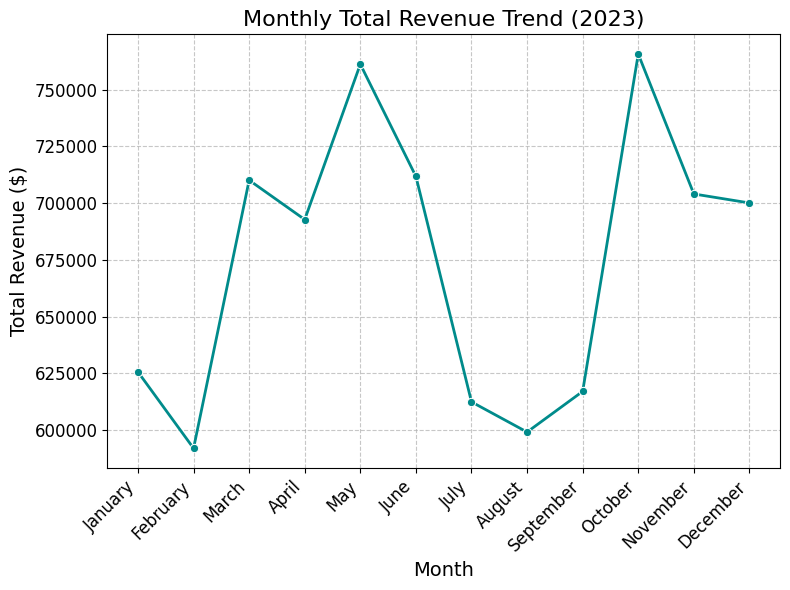

In [81]:
# Line Chart Visualization to show trend.
plt.figure(figsize=(8,6))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker='o', color='darkcyan', linewidth=2, sort=False)

plt.title('Monthly Total Revenue Trend (2023)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Revenue ($)', fontsize=14) # Label clearly
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

 the monthly total revenue trend closely follows the monthly taxi trip (pickup count) trend, showing major peaks in May and October and significant lows in February and the August-September period. The overall pattern reflects a strong spring and autumn season for revenue generation, contrasted with weaker winter and late summer months.

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

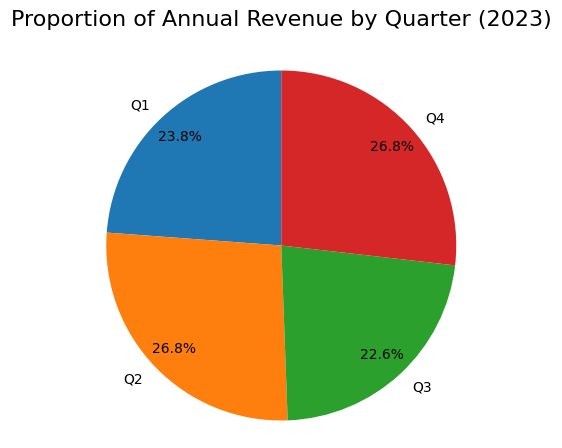

In [82]:
# Calculate proportion of each quarter
df['pickup_quarter'] = df['tpep_pickup_datetime'].dt.quarter
quarter_revenue = df.groupby('pickup_quarter')['total_amount'].sum()
quarterly_proportions = round(quarter_revenue / quarter_revenue.sum() *100,2)


plt.figure(figsize=(7, 5))

quarter_labels = [f'Q{q}' for q in quarterly_proportions.index]

plt.pie(
    quarterly_proportions,
    labels=quarter_labels,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85)

plt.title('Proportion of Annual Revenue by Quarter (2023)', fontsize=16, pad=20)
plt.axis('equal')
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [83]:
df[df.fare_amount<3]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,tip_amount,tolls_amount,total_amount,congestion_surcharge,Airport_fee,trip_duration,pickup_hour,pickup_day_name,pickup_month,pickup_quarter


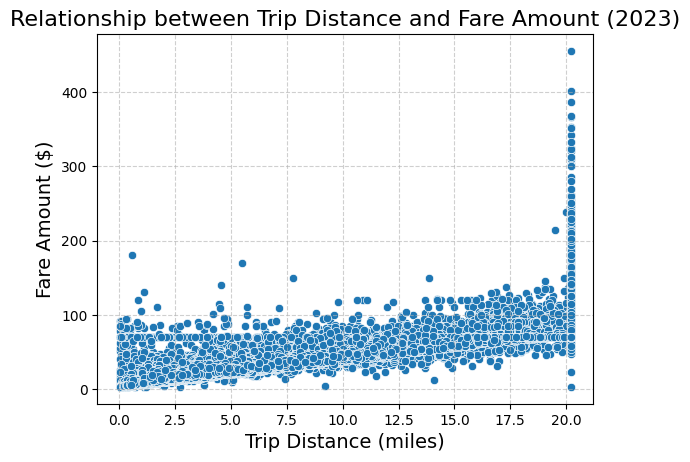


The Correlation between trip_distance and fare_amount: 0.9389


In [84]:
# Show how trip fare is affected by distance

sns.scatterplot(data=df, x='trip_distance', y='fare_amount')

plt.title('Relationship between Trip Distance and Fare Amount (2023)', fontsize=16)
plt.xlabel('Trip Distance (miles)', fontsize=14)
plt.ylabel('Fare Amount ($)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

correlation = df['trip_distance'].corr(df['fare_amount'])
print()
print(f"The Correlation between trip_distance and fare_amount: {correlation:.4f}")

The scatter plot clearly shows a positive relationship between trip distance and fare amount. The Pearson correlation coefficient of 0.9389 confirms a strong positive linear association, indicating that longer trips generally correspond to higher fares, as expected from the metered fare structure.

However, the scatter also shows considerable variability in fare for any given distance, likely due to factors such as time spent in traffic (affecting time-based charges), tolls, surcharges, and potentially different rate codes if included in the analysis.

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

                trip_duration  trip_duration_minutes
count                  276540          276540.000000
mean   0 days 00:17:44.931188              17.748568
std    0 days 00:38:41.716629              38.696067
min           0 days 00:00:00               0.000000
25%           0 days 00:08:08               8.000000
50%           0 days 00:13:02              13.000000
75%           0 days 00:20:56              21.000000
max           0 days 23:59:27            1439.000000



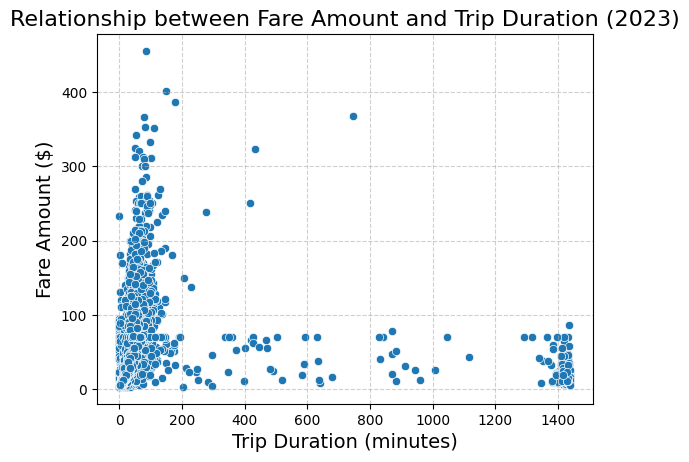


The Correlation between trip_duration and fare_amount: 0.2959


In [85]:
# Show relationship between fare and trip duration

df['trip_duration_minutes'] = round(df['trip_duration'].dt.total_seconds() / 60)
print(df[['trip_duration', 'trip_duration_minutes']].describe())
print()

sns.scatterplot(data=df, x='trip_duration_minutes', y='fare_amount')
plt.title('Relationship between Fare Amount and Trip Duration (2023)', fontsize=16)
plt.xlabel('Trip Duration (minutes)', fontsize=14)
plt.ylabel('Fare Amount ($)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

correlation = df['trip_duration_minutes'].corr(df['fare_amount'])
print()
print(f"The Correlation between trip_duration and fare_amount: {correlation:.4f}")

After data cleaning stage, extreme values represent fundamentally different scenarios (like negotiated fares vs. standard metered trips) that can skew statistical measures (like correlation) and hide the the dominant trend in visualizations. Filtering focuses the analysis on the more typical and consistent relationships present in the majority of the data.

99th percentile for fare_amount: $74.40
99th percentile for trip_duration_minutes: 67.00 minutes



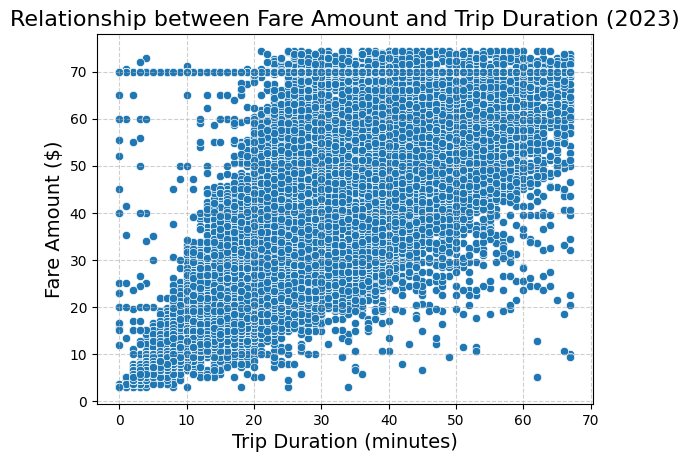


**The Correlation within 99th percentile between trip_duration and fare_amount: 0.8909


In [86]:
# Calculate the 99th percentile for fare_amount
fare_99th = df['fare_amount'].quantile(0.99)
print(f"99th percentile for fare_amount: ${fare_99th:.2f}")

# Calculate the 99th percentile for trip_duration_minutes
duration_99th = df['trip_duration_minutes'].quantile(0.99)
print(f"99th percentile for trip_duration_minutes: {duration_99th:.2f} minutes")
print()
df_99th = df[(df.fare_amount <= fare_99th) & (df.trip_duration_minutes <= duration_99th)]

# Re-visualize the relationship using this filtered df_99 DataFrame.
sns.scatterplot(data=df_99th, x='trip_duration_minutes', y='fare_amount')
plt.title('Relationship between Fare Amount and Trip Duration (2023)', fontsize=16)
plt.xlabel('Trip Duration (minutes)', fontsize=14)
plt.ylabel('Fare Amount ($)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

correlation = df_99th['trip_duration_minutes'].corr(df['fare_amount'])
print()
print(f"**The Correlation within 99th percentile between trip_duration and fare_amount: {correlation:.4f}")

Insight:
- Removing the extreme outliers and non-standard trips (like potentially high-fare negotiated trips) helps focusing on the large number of regular metered taxi rides.
- Within the typical range of taxi operations (up to 67 minutes and fares up to $74.40, covering 99% of trips), there is a strong positive linear correlation (r ≈ 0.89) between trip duration and fare amount. This indicates that for the vast quantity of taxi rides, longer durations are strongly associated with higher fares.
- Howerver, while the relationship is strong, the noticeable scatter in the plot highlights that duration isn't the only factor; distance covered within that time and other charges still play a significant role in determining the exact fare, even for these more typical trips.

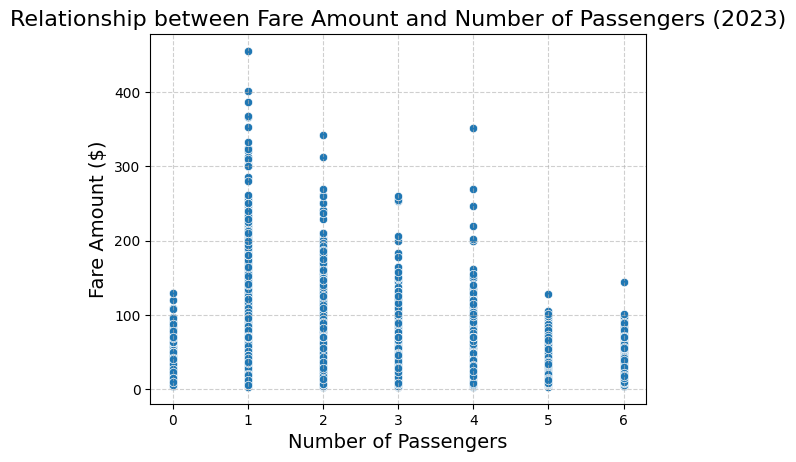


The Correlation between passenger_count and fare_amount: 0.0437


In [87]:
# Show relationship between fare and number of passengers
sns.scatterplot(data=df, x='passenger_count', y='fare_amount')
plt.title('Relationship between Fare Amount and Number of Passengers (2023)', fontsize=16)
plt.xlabel('Number of Passengers', fontsize=14)
plt.ylabel('Fare Amount ($)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

correlation = df['passenger_count'].corr(df['fare_amount'])
print()
print(f"The Correlation between passenger_count and fare_amount: {correlation:.4f}")

Based on the scatter plot and the extremely low correlation coefficient (r ≈ 0.04), we can conclude that there is no meaningful linear correlation between the number of passengers and the fare amount for NYC taxi trips. This aligns with the fare structure, which primarily depends on trip distance and duration, not the passenger count.

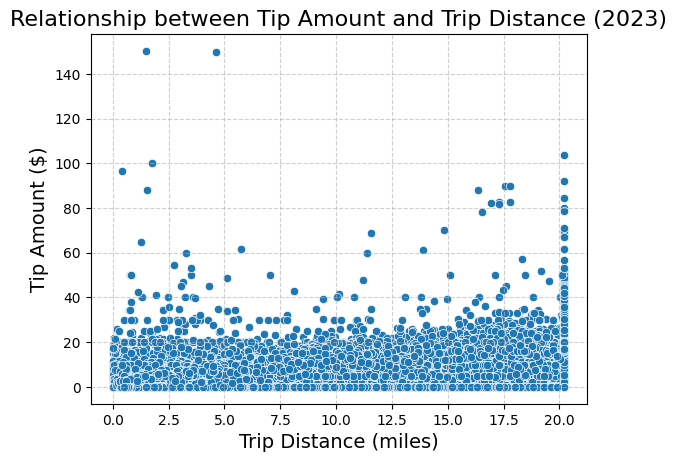


The Correlation between trip_distance and tip_amount: 0.5940


In [88]:
# Show relationship between tip and trip distance
sns.scatterplot(data=df, x='trip_distance', y='tip_amount')
plt.title('Relationship between Tip Amount and Trip Distance (2023)', fontsize=16)
plt.xlabel('Trip Distance (miles)', fontsize=14)
plt.ylabel('Tip Amount ($)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

correlation = df['trip_distance'].corr(df['tip_amount'])
print()
print(f"The Correlation between trip_distance and tip_amount: {correlation:.4f}")

The plot reveals a moderate positive linear relationship (r ≈ 0.59) between trip_distance and the tip_amount by card. It is a moderate correlation due to factors such as unrecorded cash tips, variable tipping behavior.

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [89]:
df.payment_type.value_counts()

,count
payment_type,
1,227341
2,46675
4,1666
3,858


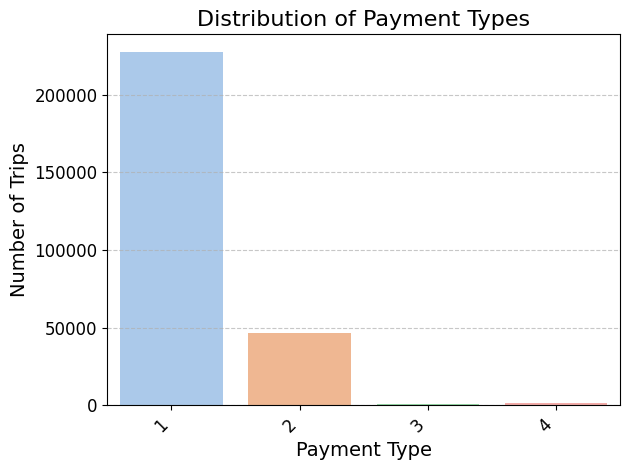

In [90]:
# Analyse the distribution of different payment types (payment_type).

sns.countplot(data=df, x='payment_type', palette='pastel')
plt.title('Distribution of Payment Types', fontsize=16)
plt.xlabel('Payment Type', fontsize=14)
plt.ylabel('Number of Trips', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [91]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [92]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/EDA_Assignment_NYC Yellow Taxi_DSC77/Datasets and Dictionary/taxi_zones/taxi_zones.shp') # read the .shp file using gpd
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

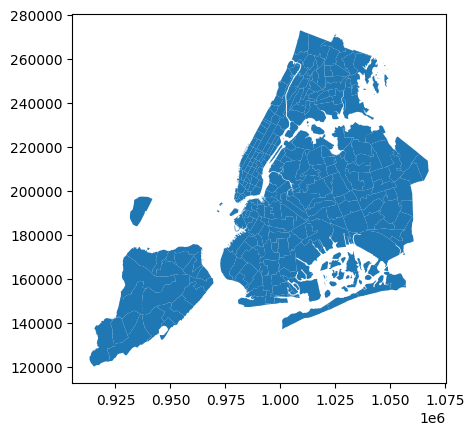

In [93]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [94]:
# Merge zones and trip records using locationID and PULocationID
merged_data = pd.merge(df, zones, left_on='PULocationID', right_on='LocationID', how='left')
# merged_data.info()
merged_data= merged_data.drop(columns=['LocationID'])

merged_data.rename(columns={'zone': 'pickup_zone_name', 'borough': 'pickup_borough', 'geometry': 'pickup_geometry'}, inplace=True)
merged_data.info()
merged_data.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276559 entries, 0 to 276558
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype          
---  ------                 --------------   -----          
 0   VendorID               276559 non-null  int64          
 1   tpep_pickup_datetime   276559 non-null  datetime64[us] 
 2   tpep_dropoff_datetime  276559 non-null  datetime64[us] 
 3   passenger_count        276559 non-null  float64        
 4   trip_distance          276559 non-null  float64        
 5   RatecodeID             276559 non-null  float64        
 6   PULocationID           276559 non-null  int64          
 7   DOLocationID           276559 non-null  int64          
 8   payment_type           276559 non-null  int64          
 9   fare_amount            276559 non-null  float64        
 10  extra                  276559 non-null  float64        
 11  tip_amount             276559 non-null  float64        
 12  tolls_amount           276559 

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,pickup_day_name,pickup_month,pickup_quarter,trip_duration_minutes,OBJECTID,Shape_Leng,Shape_Area,pickup_zone_name,pickup_borough,pickup_geometry
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,138,256,2,32.4,...,Sunday,January,1,16.0,138.0,0.107467,0.000537,LaGuardia Airport,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031..."
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,161,237,1,7.9,...,Sunday,January,1,5.0,161.0,0.035804,0.000072,Midtown Center,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21..."
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,237,141,2,11.4,...,Sunday,January,1,11.0,237.0,0.042213,0.000096,Upper East Side South,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21..."


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [95]:
# Group data by location and calculate the number of trips
merged_data.pickup_borough.value_counts()

pickup_counts = merged_data.groupby('PULocationID').size().sort_values(ascending=False)
print("Top 10 Busiest Pickup Zones: ")
print(pickup_counts.head(20))

Top 10 Busiest Pickup Zones: 
PULocationID
132    14814
161    13130
237    12480
236    11060
162    10267
138    10013
186     9903
230     9404
142     9215
163     8341
170     8265
234     7674
239     7635
48      7365
68      7314
141     6625
164     6595
79      6505
249     6321
107     5941
dtype: int64


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [96]:
# Merge trip counts back to the zones GeoDataFrame
pickup_counts_df = pickup_counts.reset_index(name='total_trips')
zone_pickup_counts = zones.merge(pickup_counts_df, left_on='LocationID', right_on='PULocationID', how='left')
zone_pickup_counts['total_trips'].fillna(0, inplace=True)
zone_pickup_counts['total_trips'] = zone_pickup_counts['total_trips'].astype(int)
zone_pickup_counts

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,total_trips
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",1.0,1
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",NaN,0
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",3.0,7
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",4.0,275
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",5.0,2
...,...,...,...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,"POLYGON ((1025414.782 270986.139, 1025138.624 ...",259.0,3
259,260,0.133514,0.000422,Woodside,260,Queens,"POLYGON ((1011466.966 216463.005, 1011545.889 ...",260.0,42
260,261,0.027120,0.000034,World Trade Center,261,Manhattan,"POLYGON ((980555.204 196138.486, 980570.792 19...",261.0,1525
261,262,0.049064,0.000122,Yorkville East,262,Manhattan,"MULTIPOLYGON (((999804.795 224498.527, 999824....",262.0,3573


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

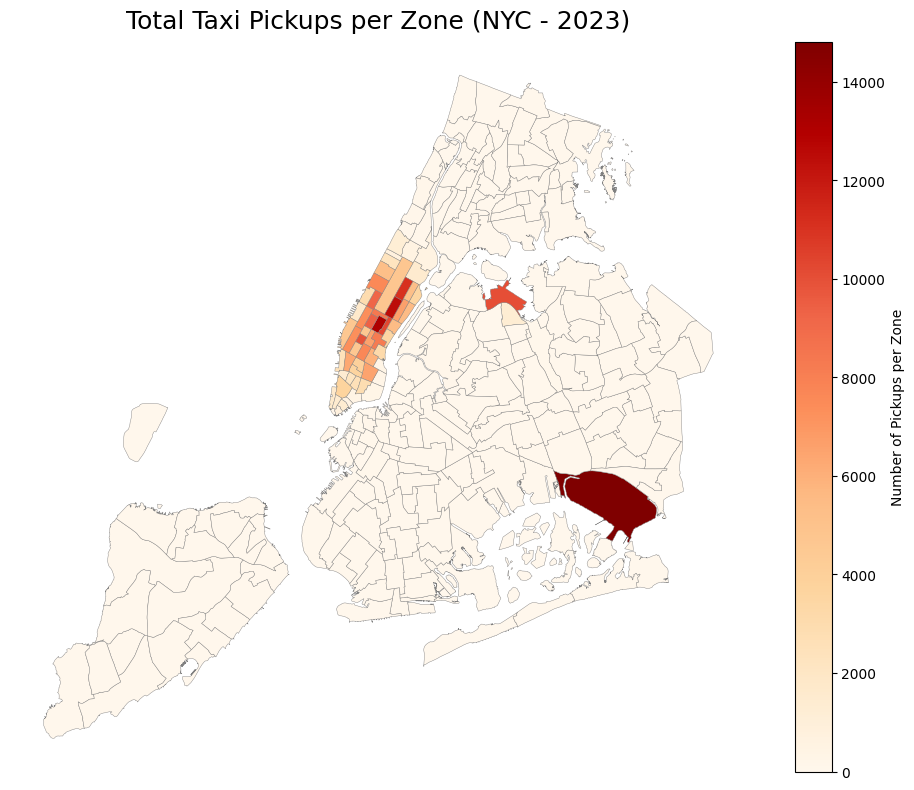

In [97]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))

zone_pickup_counts.plot(
    column='total_trips', ax=ax,# The axis to plot on
    legend=True,
    legend_kwds={'label': "Number of Pickups per Zone", # Label for the legend color bar
                  'orientation': "vertical"},           # Orientation of the legend
    cmap='OrRd',
    edgecolor='gray', # Color for the zone boundaries
    linewidth=0.3) # Width of the zone boundaries

ax.set_title('Total Taxi Pickups per Zone (NYC - 2023)', fontsize=18, pad=10)
ax.set_axis_off()  # Remove the axis numbers and ticks for a cleaner map appearance

plt.tight_layout()
plt.show()

In [98]:
# can you try displaying the zones DF sorted by the number of trips?
print("\nThe zones DF sorted by the number of trips:")
print(zone_pickup_counts[['PULocationID', 'borough', 'zone', 'total_trips']].sort_values(by='total_trips', ascending=False))


The zones DF sorted by the number of trips:
     PULocationID        borough                                 zone  \
131         132.0         Queens                          JFK Airport   
160         161.0      Manhattan                       Midtown Center   
236         237.0      Manhattan                Upper East Side South   
235         236.0      Manhattan                Upper East Side North   
161         162.0      Manhattan                         Midtown East   
..            ...            ...                                  ...   
83            NaN  Staten Island    Eltingville/Annadale/Prince's Bay   
26            NaN         Queens  Breezy Point/Fort Tilden/Riis Beach   
29            NaN         Queens                        Broad Channel   
244           NaN  Staten Island                        West Brighton   
1             NaN         Queens                          Jamaica Bay   

     total_trips  
131        14814  
160        13130  
236        12480  
23

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


Answer: Summary of Findings about NYC Taxi Trips in 2023:

**1/ Busiest Hours, Days, and Months (for Pickups):**

- Hourly Trends:
Taxis are quietest very early in the morning (around 3-5 AM). They get busy for the morning commute (6-9 AM), stay high all day, and get busiest in the early evening (5-7 PM) as people head home from work or go out. It stays pretty busy late into the night too.
- Daily Trends:
Mondays are the slowest day for taxis. It gets busier as the week goes on, with Wednesday and Thursday usually being the busiest days. Fridays and Saturdays remain high pickup volumes. Sunday sees a notable decrease from the late-week highs.
- Monthly Trends:
Taxis were busiest in May and again in October. The slowest months for taxi rides were February and September.
- Heatmap Insights (Interaction of Hour and Day):
The additional heatmap visually confirms your previous findings from the individual hourly and daily bar charts.
Sunday and Monday are the quietest days overall, especially in the morning.
Thursday (and Wednesday) appear as the overall busiest days, particularly strong throughout the afternoon and into the evening peak.
Friday and Saturday show high activity, especially in the evenings and nights.
Sunday is a day of moderate activity, tapering off in the evening.
Late Night: Friday and Saturday nights were much busier for taxis after midnight compared to other nights of the week.

**2/ Trends in Revenue Collected (Monthly):**

The monthly total revenue largely reflected the pickup volume trends. The highest revenue months were May and October, aligning with their high pickup volumes.
The lowest revenue months were February and the August-September period. Notably, even though September had the fewest trips, its revenue wasn't the absolute lowest due to a higher average fare per trip observed in that month.

**3/ Trends in Quarterly Revenue:**

- Based on the monthly revenue patterns, Q2 (April-May-June), driven by the May peak, and Q4 (October-November-December), driven by the October peak and likely strong end-of-year activities, were the highest revenue-generating quarters.
Q3 mostly in summer (July-August-September) was likely the lowest revenue quarter.
Q1 (January-February-March) was also relatively low, impacted by the February slump, but likely slightly ahead of Q3 due to a stronger March.

**4/ How Fare Depends on Trip Distance, Trip Duration, and Passenger Counts:**

- Trip Distance: There is a strong positive linear correlation (r ≈ 0.94) between trip_distance and fare_amount. Longer trips consistently result in higher fares, as expected from the metered structure. Variability exists due to time-based charges, tolls, surcharges, and different rate codes (especially for very long distances or specific airport trips, where recorded distance might not be the sole fare determinant, as seen with the ~20-mile anomalies for high fares).

- Trip Duration:
The price for the same distance can still vary because of traffic, tolls, extra fees, or special rates (like some very expensive trips that were only recorded as ~20 miles long).
Therefore, when focusing on the majority of typical trips (filtering up to the 99th percentile for both duration and fare), a strong positive linear correlation (r ≈ 0.89) emerged. This indicates that for most standard trips, longer durations are strongly associated with higher fares, reflecting time-based charges and the natural correlation between time and distance for typical journeys.

- Passenger Counts: There is no meaningful correlation (r ≈ 0.04) between passenger_count and fare_amount. This is logical as NYC taxi fares are primarily based on distance and time, not the number of passengers.


**5/ How Tip Amount Depends on Trip Distance:**
There is a moderate positive correlation (r ≈ 0.59) between trip_distance and the recorded tip_amount. This suggests that longer (and typically more expensive) trips tend to receive larger tips, particularly for credit card transactions where tips are automatically recorded. The relationship's moderate strength is influenced by variable tipping behaviors and the significant number of $0 tip entries, many of which likely represent unrecorded cash tips.

**6/Busiest Zones (for Pickups):**

High-traffic areas such as JFK Airport (PULocationID 132) consistently appeared as one of the busiest pickup zones.
Several zones in Manhattan, particularly in Midtown (e.g., PULocationIDs 161, 162, 163, 230 - Times Sq/Theatre District, 186 - Penn Station) and the Upper East Side (e.g., PULocationIDs 236, 237), also showed very high pickup volumes, indicating these are key areas for taxi activity.

#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [99]:
# Find routes which have the slowest speeds at different times of the day (***performed in seperate 3 cells)

# Filter data - including a more realistic duration limit for this specific analysis
df_filtered = df[(df['PULocationID'] != df['DOLocationID']) & (df['trip_distance'] > 0) & (df['trip_duration_minutes'] > 0)]

print(df_filtered['trip_duration_minutes'].describe())

df_filtered['trip_duration_minutes'].quantile([0.90, 0.95, 0.98, 0.99, 0.995, 0.999])

count    276446.000000
mean         17.754603
std          38.701261
min           1.000000
25%           8.000000
50%          13.000000
75%          21.000000
max        1439.000000
Name: trip_duration_minutes, dtype: float64


,trip_duration_minutes
0.900,33.0
0.950,43.0
0.980,57.0
0.990,67.0
0.995,77.0
0.999,121.0


To analyze typical slow routes, trip durations were limited to 121 minutes. This data-informed threshold (99.9% of inter-zone trips < 121 min; max observed 1439 min) filters out extreme outliers, enabling a clearer analysis of operational slowness due to high traffic and demand.

In [100]:
df_filtered = df_filtered[df_filtered['trip_duration_minutes'] <= 121]

In [101]:
# Group by route and hour, calculate mean distance, duration, AND TRIP COUNT as hint "How does identifying high-traffic, high-demand routes help us?"
route_stats = df_filtered.groupby(['PULocationID', 'DOLocationID', 'pickup_hour']).agg(
    avg_trip_distance=('trip_distance', 'mean'),
    avg_trip_duration_minutes=('trip_duration_minutes', 'mean'),
    trip_count=('trip_distance', 'count')).reset_index()

# Calculate speed
route_stats['avg_speed_mph'] = (route_stats['avg_trip_distance'] / route_stats['avg_trip_duration_minutes']) *60

# Filter by minimum trip count for very short (around 1 mile), and extremely frequently traveled routes.
min_trips_threshold = 50 # Assumption: Require at least 50 trips for this route-hour
route_stats = route_stats[route_stats['trip_count'] >= min_trips_threshold]

# Identify the slowest routes for each hour.
slowest_routes_by_hour = route_stats.loc[route_stats.groupby('pickup_hour')['avg_speed_mph'].idxmin()]

print("\nSlowest Routes by Hour:")
slowest_routes_by_hour[['PULocationID', 'DOLocationID', 'pickup_hour', 'avg_speed_mph', 'avg_trip_distance', 'avg_trip_duration_minutes', 'trip_count']].sort_values(by='avg_speed_mph')


Slowest Routes by Hour:


,PULocationID,DOLocationID,pickup_hour,avg_speed_mph,avg_trip_distance,avg_trip_duration_minutes,trip_count
38175,163,230,18,4.406972,0.800600,10.900000,50
42805,186,161,9,4.931524,1.290820,15.704918,61
35351,161,186,16,4.967509,1.298113,15.679245,53
53834,237,161,17,5.156054,0.974407,11.338983,59
53829,237,161,12,5.388177,1.098193,12.228916,83
53830,237,161,13,5.423138,1.014478,11.223881,67
53832,237,161,15,5.477165,1.022941,11.205882,68
53828,237,161,11,5.484112,1.043200,11.413333,75
53831,237,161,14,5.529426,1.020909,11.077922,77
42804,186,161,8,5.773840,1.221786,12.696429,56


Insight:

By setting the min_trips_threshold to 50, the analysis identifies routes that are still very frequently traveled (at least 50 trips per route per hour) and experience significant slowness. The results highlight short-distance trips (around 1-2 miles) within core areas (involving recurring Location IDs like 161, 186, 230, 236, 237) as having very low average speeds, often between 4 and 12 mph, particularly during daytime and evening hours. This provides insights into a set of consistently congested, high-demand short-haul streets.

Interestingly, the times when these very common short routes are slowest (like the evening hours around 5 PM - 7 PM, which had some of the lowest speeds in our output) match up well with the overall busiest 'hot spot' hours for all taxi pickups city-wide that we saw in our earlier heatmap. This suggests that when the whole taxi system gets very busy (like during the evening rush), these already popular short routes get even more jammed with traffic.

How does identifying high-traffic, high-demand routes help us?
It helps significantly in Taxi Operations (Drivers and Fleet Management), customer experience and pricing strategy:

Answer:
- Strategic Positioning: Drivers can better understand where and when to find passengers (high-demand areas/times). If a high-demand route is also frequently high-traffic (slow), drivers might adjust their strategies, perhaps by anticipating longer trip times or being more selective during extreme congestion.

- Improved customer experience: Understanding typical travel times on these congested, popular routes helps in giving passengers more realistic arrival time estimates.

- Revenue Optimization: Knowing where demand is consistently high allows for better fleet distribution to meet that demand, potentially increasing overall utilization and revenue.

- Taxi Operation Department can use historical data on high-traffic, high-demand routes to provide more accurate travel time predictions and suggest more efficient alternative routes to drivers and passengers, especially during specific times of day. (in taxi app).

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

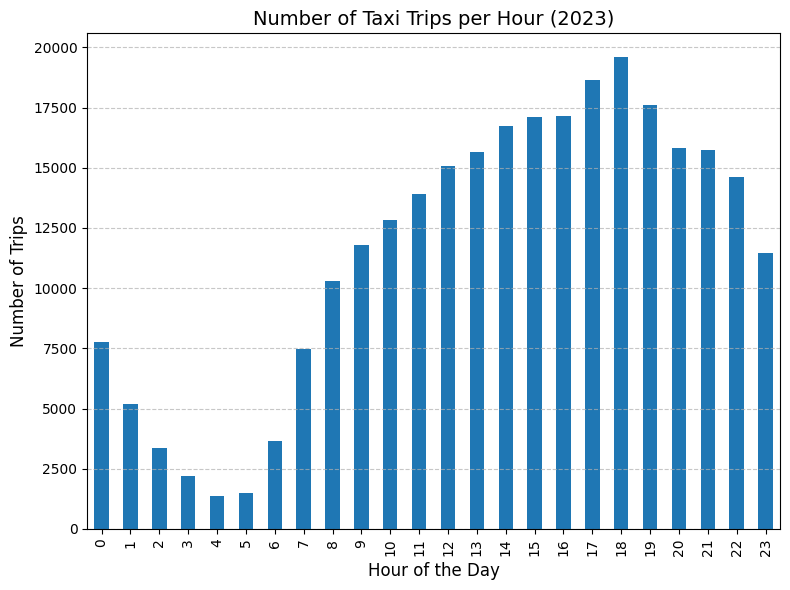

In [102]:
# Visualise the number of trips per hour and find the busiest hour
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
hourly_pickups_sampled  = df['pickup_hour'].value_counts().sort_index()

hourly_pickups_sampled.plot(kind='bar', figsize=(8, 6))
plt.title('Number of Taxi Trips per Hour (2023)', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

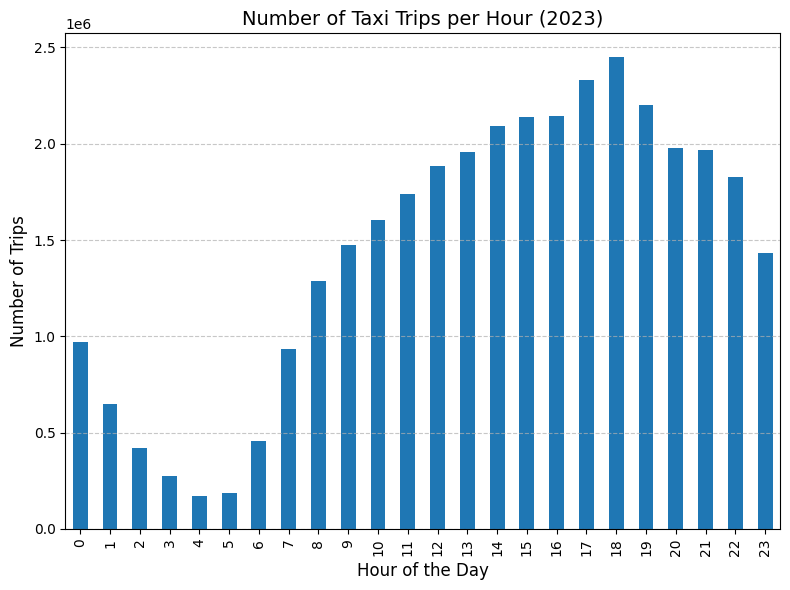


The actual number of trips in the five busiest hours (from 3pm to 7pm, with the busiest at 6pm): 
pickup_hour
18    2450500
17    2330875
19    2199875
16    2144250
15    2138875
Name: count, dtype: int64


In [104]:
# Scale up the number of trips
trip_count = df['pickup_hour'].value_counts().sort_index()
# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.008  # the original ratio of sampling

trip_count_actual = (trip_count / sample_fraction).astype(int)

trip_count_actual.plot(kind='bar', figsize=(8, 6))
plt.title('Number of Taxi Trips per Hour (2023)', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nThe actual number of trips in the five busiest hours (from 3pm to 7pm, with the busiest at 6pm): ")
print(trip_count_actual.sort_values(ascending=False).head(5))

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [105]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'tip_amount',
       'tolls_amount', 'total_amount', 'congestion_surcharge', 'Airport_fee',
       'trip_duration', 'pickup_hour', 'pickup_day_name', 'pickup_month',
       'pickup_quarter', 'trip_duration_minutes'],
      dtype='object')

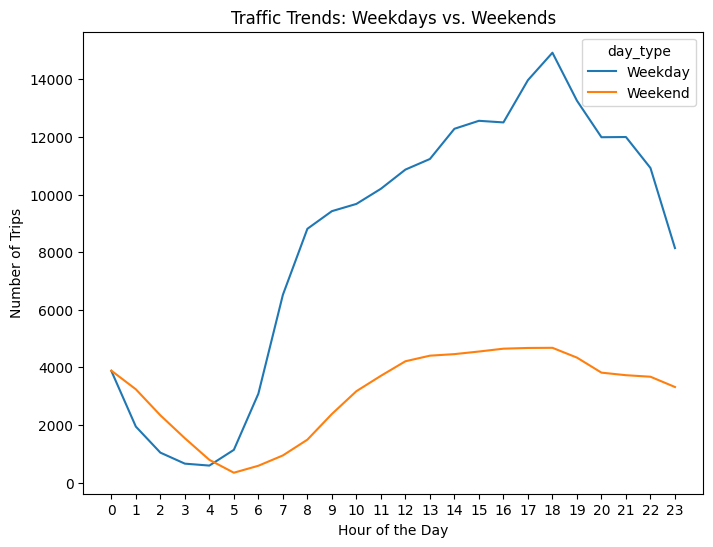

In [106]:
# Compare traffic trends for the week days and weekends
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

df['day_type'] = df['pickup_day_name'].apply(lambda x: 'Weekday' if x in weekday_names else 'Weekend')

traffic_trends  = df.groupby(['day_type','pickup_hour']).size().reset_index(name='trip_count')

plt.figure(figsize=(8, 6))
sns.lineplot(x='pickup_hour', y='trip_count', hue='day_type', data= traffic_trends )
plt.title('Traffic Trends: Weekdays vs. Weekends')
plt.xlabel('Hour of the Day')
plt.xticks(ticks=range(0, 24, 1))
plt.ylabel('Number of Trips')
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

- While both weekdays and weekends follow a general pattern of being quiet in the very early morning and busiest in the afternoon and evening, weekdays are characterized by much higher volumes and more sharply defined commute peaks.Weekends, in contrast, have much lower overall volume and a more spread-out, less varied activity pattern throughout the day, reflecting leisure-based travel rather than a strong commuter rush.

**Similarities in Hourly Patterns:**
- Early Morning Low: Both weekdays and weekends see a significant decrease in taxi trips after midnight (0:00), reaching their lowest point around 4:00-5:00 AM.
- Morning Increase: From this early morning low around 5:00 AM, the number of trips starts to increase on both weekdays and weekends.
- Evening Peak Timing: Both trend lines show their highest activity levels generally occurring in the late afternoon to early evening, roughly peaking around 5:00 PM - 7:00 PM (hours 17-19) before starting to decline.

**Key Differences:**
- Overall Trip Volume: During peak hours (e.g., around 5-7 PM), weekday trip volume is roughly 2.5 to 3 times greater than on weekend days. For example, at 6 PM (hour 18), weekdays see around 14500 trips, while weekends see around 4700.

- Shape of the Daily Curve (Variability)

  - Weekday taxi use changes a lot throughout the day, with clear busy times. There's a big rush in the morning (around 6-9 AM) and an even bigger one in the evening (around 5-7 PM) for work commutes, with lots of trips during the day too. After the evening peak, the number of trips drops off quickly.

  - Weekends are different and more steady. Taxi activity starts later in the morning and rises more slowly. The busy period in the afternoon and evening is more spread out, without the sharp peaks you see on weekdays. Late at night, the number of trips on weekends goes down more gradually than on weekdays.

- Late night: After around 10 PM (22:00), the number of trips on weekdays drops off more sharply than on weekends, where the decline is more gradual. Both show low activity in the very early morning hours (1 AM - 5 AM), with weekends being slightly higher than weekdays at hour 0 (midnight) but then similarly low

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [107]:
# Find top 10 pickup and dropoff zones
# 1. Top ten pickup zone (already coded in question 3.1.13)
print("\nTop 10 Busiest Pickup Zones:")
print(zone_pickup_counts[['zone', 'total_trips']].sort_values(by='total_trips', ascending=False).head(10))

# 2. Top ten dropoff zone
dropoff_counts = df.groupby('DOLocationID').size().reset_index(name='dropoff_count')
top_10_DOID = dropoff_counts.sort_values(by='dropoff_count', ascending=False).head(10)
top_10_dropoff_zones = pd.merge(top_10_DOID, zones[['LocationID', 'zone', 'borough']], left_on='DOLocationID', right_on='LocationID',  how='left')

top_10_dropoff_zones_display = top_10_dropoff_zones[['DOLocationID','zone', 'dropoff_count']].set_index('DOLocationID')

print("\nTop 10 Busiest Dropoff Zones:")
print(top_10_dropoff_zones_display)


Top 10 Busiest Pickup Zones:
                             zone  total_trips
131                   JFK Airport        14814
160                Midtown Center        13130
236         Upper East Side South        12480
235         Upper East Side North        11060
161                  Midtown East        10267
137             LaGuardia Airport        10013
185  Penn Station/Madison Sq West         9903
229     Times Sq/Theatre District         9404
141           Lincoln Square East         9215
162                 Midtown North         8341

Top 10 Busiest Dropoff Zones:
                                   zone  dropoff_count
DOLocationID                                          
236               Upper East Side North          11771
237               Upper East Side South          10969
161                      Midtown Center          10901
230           Times Sq/Theatre District           8546
170                         Murray Hill           8369
162                        Midtown Ea

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [108]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# 1. Calculate pickup & dropoff counts for each zone
pickup_counts = df.groupby('PULocationID').size().rename('pickup_count')
dropoff_counts = df.groupby('DOLocationID').size().rename('dropoff_count')

# 2. Create a DataFrame with all zone LocationIDs as the base
zone_activity = pd.DataFrame(zones['LocationID'].unique(), columns=['LocationID'])

# 3. Merge pickup counts into zone_activity
zone_activity = pd.merge(zone_activity, pickup_counts, left_on='LocationID', right_index=True, how='left')

# 4. Merge dropoff counts into zone_activity
zone_activity = pd.merge(zone_activity, dropoff_counts, left_on='LocationID', right_index=True, how='left')

# 5. Fill NaN counts with 0 (for zones with no pickups or no dropoffs)
zone_activity['pickup_count'] = zone_activity['pickup_count'].fillna(0).astype(int)
zone_activity['dropoff_count'] = zone_activity['dropoff_count'].fillna(0).astype(int)

# 8. Calculate the pickup/dropoff ratio
zone_activity['pu_do_ratio'] = zone_activity['pickup_count'] / (zone_activity['dropoff_count'] + 1)

# 9. Merge with zone names and boroughs for better readability
zone_activity_with_names = pd.merge(zone_activity, zones[['LocationID', 'zone', 'borough']], on='LocationID', how='left')

# 10. Display the 10 zones with the HIGHEST pickup/dropoff ratio
top_10_highest_ratio = zone_activity_with_names.sort_values(by='pu_do_ratio', ascending=False).head(10)
print("Top 10 Zones with HIGHEST Pickup-to-Dropoff Ratio (Primarily Pickup Hotspots):")
print(top_10_highest_ratio[['LocationID', 'zone', 'borough', 'pickup_count', 'dropoff_count', 'pu_do_ratio']])

# 10. Display the 10 zones with the LOWEST pickup/dropoff ratio
lowest_ratios_df = zone_activity_with_names[
    (zone_activity_with_names['dropoff_count'] > 0) & ((zone_activity_with_names['pickup_count'] > 0) | (zone_activity_with_names['dropoff_count'] > 0)) ]

top_10_lowest_ratio = lowest_ratios_df.sort_values(by='pu_do_ratio', ascending=True).head(10)
print("\nTop 10 Zones with LOWEST Pickup-to-Dropoff Ratio (Primarily Dropoff Hotspots)")
print(top_10_lowest_ratio[['LocationID', 'zone', 'borough', 'pickup_count', 'dropoff_count', 'pu_do_ratio']])

Top 10 Zones with HIGHEST Pickup-to-Dropoff Ratio (Primarily Pickup Hotspots):
     LocationID                          zone    borough  pickup_count  \
69           70                 East Elmhurst     Queens          1311   
131         132                   JFK Airport     Queens         14814   
137         138             LaGuardia Airport     Queens         10013   
185         186  Penn Station/Madison Sq West  Manhattan          9903   
42           43                  Central Park  Manhattan          4718   
248         249                  West Village  Manhattan          6321   
113         114       Greenwich Village South  Manhattan          3694   
161         162                  Midtown East  Manhattan         10267   
160         161                Midtown Center  Manhattan         13130   
99          100              Garment District  Manhattan          4676   

     dropoff_count  pu_do_ratio  
69             128    10.162791  
131           2699     5.486667  
137 

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [109]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Define Night Hours and Filter Trips
night_hours = [23, 0, 1, 2, 3, 4, 5]

df_night_trips = df[df['pickup_hour'].isin(night_hours)]

# --- Top 10 Pickup Zones During Night Hours ---
night_pickup_counts = df_night_trips.groupby('PULocationID').size().reset_index(name='night_pickup_count')
top_10_night_pickup_ids = night_pickup_counts.sort_values(by='night_pickup_count', ascending=False).head(10)

# Merge with zones data to get names and boroughs
top_10_night_pickup_zones = pd.merge(top_10_night_pickup_ids, zones[['LocationID', 'zone', 'borough']], left_on='PULocationID', right_on='LocationID', how='left')
top_10_night_pickup_zones_display = top_10_night_pickup_zones[['PULocationID', 'zone', 'night_pickup_count']]

print("\nTop 10 Pickup Zones During Night Hours (11 PM - 5 AM):")
print(top_10_night_pickup_zones_display)

# --- Top 10 Dropoff Zones During Night Hours ---
# Note: These are dropoffs for trips that *started* during night hours.
night_dropoff_counts = df_night_trips.groupby('DOLocationID').size().reset_index(name='night_dropoff_count')
top_10_night_dropoff_ids = night_dropoff_counts.sort_values(by='night_dropoff_count', ascending=False).head(10)

# Merge with zones data to get names and boroughs
top_10_night_dropoff_zones = pd.merge(top_10_night_dropoff_ids, zones[['LocationID', 'zone', 'borough']], left_on='DOLocationID', right_on='LocationID', how='left')
top_10_night_dropoff_zones_display = top_10_night_dropoff_zones[['DOLocationID', 'zone', 'night_dropoff_count']]

print("\nTop 10 Dropoff Zones During Night Hours (11 PM - 5 AM):")
print(top_10_night_dropoff_zones_display)


Top 10 Pickup Zones During Night Hours (11 PM - 5 AM):
   PULocationID                          zone  night_pickup_count
0            79                  East Village                2342
1           132                   JFK Airport                2247
2           249                  West Village                1978
3            48                  Clinton East                1557
4           148               Lower East Side                1509
5           114       Greenwich Village South                1336
6           230     Times Sq/Theatre District                1309
7           186  Penn Station/Madison Sq West                1108
8           138             LaGuardia Airport                 972
9           164                 Midtown South                 946

Top 10 Dropoff Zones During Night Hours (11 PM - 5 AM):
   DOLocationID                           zone  night_dropoff_count
0            79                   East Village                 1186
1            48          

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [110]:
# Filter for night hours (11 PM to 5 AM)
# 1. Use 'pickup_hour' existing
# 2. Categorize trips
df['time_of_day'] = df['pickup_hour'].apply(lambda hour: 'Night (11PM-5AM)' if hour in night_hours else 'Day (5AM-11PM)')

# 3. Calculate total revenue by time of day
revenue_by_time_of_day = df.groupby('time_of_day')['total_amount'].sum()

# 4. Calculate and print revenue share
revenue_share_percent = (revenue_by_time_of_day / revenue_by_time_of_day.sum()) * 100
print("Revenue Share by Time of Day (%):")
print(revenue_share_percent.round(2))

Revenue Share by Time of Day (%):
time_of_day
Day (5AM-11PM)      87.91
Night (11PM-5AM)    12.09
Name: total_amount, dtype: float64


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [111]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,Airport_fee,trip_duration,pickup_hour,pickup_quarter,trip_duration_minutes
count,276540.00000,276540,276540,276540.000000,276540.000000,276540.000000,276540.000000,276540.000000,276540.000000,276540.000000,276540.000000,276540.000000,276540.000000,276540.000000,276540.000000,276540.000000,276540,276540.000000,276540.000000,276540.000000
mean,1.73747,2023-07-01 20:27:43.558309,2023-07-01 20:45:28.489499,1.369382,3.546068,1.060234,164.361420,163.018713,1.193061,20.002098,1.661099,3.650718,0.609371,29.261196,2.330793,0.112601,0 days 00:17:44.931188,14.323472,2.502680,17.748568
min,1.00000,2023-01-01 00:04:34,2023-01-01 00:09:40,0.000000,0.010000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,4.500000,0.000000,0.000000,0 days 00:00:00,0.000000,1.000000,0.000000
25%,1.00000,2023-04-01 18:21:34.500000,2023-04-01 18:38:42,1.000000,1.140000,1.000000,132.000000,113.000000,1.000000,9.300000,0.000000,1.000000,0.000000,16.400000,2.500000,0.000000,0 days 00:08:08,11.000000,2.000000,8.000000
50%,2.00000,2023-06-25 23:34:53.500000,2023-06-25 23:51:07.500000,1.000000,1.870000,1.000000,161.000000,162.000000,1.000000,14.200000,1.000000,2.940000,0.000000,21.400000,2.500000,0.000000,0 days 00:13:02,15.000000,2.000000,13.000000
75%,2.00000,2023-10-05 21:44:17.500000,2023-10-05 22:01:48,1.000000,3.510000,1.000000,233.000000,234.000000,1.000000,21.900000,2.500000,4.540000,0.000000,31.080000,2.500000,0.000000,0 days 00:20:56,19.000000,4.000000,21.000000
max,2.00000,2023-12-31 23:48:25,2023-12-31 23:54:00,6.000000,20.200000,5.000000,265.000000,265.000000,4.000000,455.200000,14.250000,150.290000,50.000000,488.700000,2.500000,1.250000,0 days 23:59:27,23.000000,4.000000,1439.000000
std,0.44001,NaN,NaN,0.892488,4.352861,0.316329,63.077768,69.441616,0.445130,17.726737,1.844853,4.023842,2.181748,22.471491,0.628003,0.357873,0 days 00:38:41.716629,5.786900,1.128845,38.696067


--- Average Fare per Mile per Passenger ---
passenger_count
1.0    8.28
2.0    4.08
3.0    2.64
4.0    2.10
5.0    1.50
6.0    1.25
dtype: float64


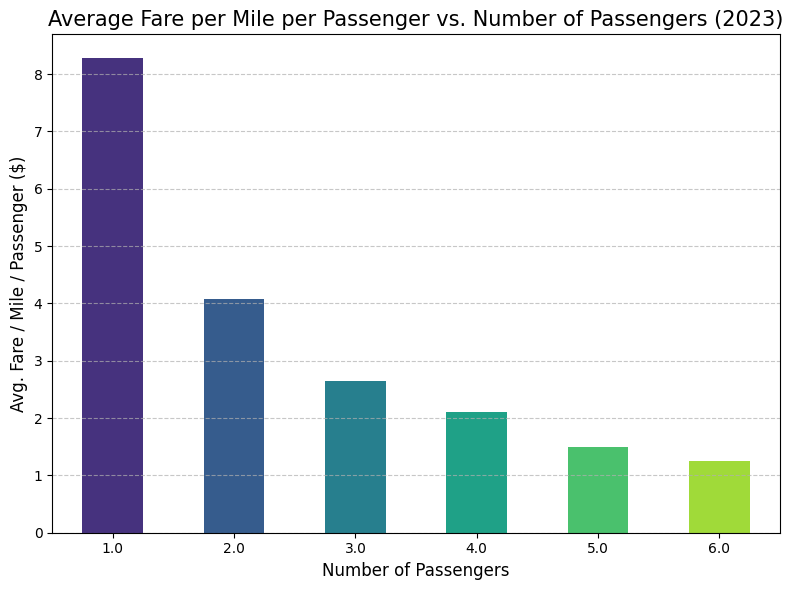

In [112]:
# Analyse the fare per mile per passenger for different passenger counts
df = df[(df['trip_distance'] > 0) & (df['passenger_count'] > 0) & (df['fare_amount'] >= 0)]

# 1. Calculate 'fare_per_mile' for each individual trip
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']

# 2. Group by 'passenger_count' and calculate the average 'fare_per_mile_trip' for each group
avg_fare_per_mile_for_group = df.groupby('passenger_count')['fare_per_mile'].mean()

# 3. Calculate 'fare_per_mile_per_passenger'
fare_per_mile_per_passenger = avg_fare_per_mile_for_group / avg_fare_per_mile_for_group.index

print("--- Average Fare per Mile per Passenger ---")
print(fare_per_mile_per_passenger.round(2))

# 4.Visualize the result
plt.figure(figsize=(8, 6))
fare_per_mile_per_passenger.plot(kind='bar', color=sns.color_palette('viridis', len(fare_per_mile_per_passenger)))
plt.title('Average Fare per Mile per Passenger vs. Number of Passengers (2023)', fontsize=15)
plt.xlabel('Number of Passengers', fontsize=12)
plt.ylabel('Avg. Fare / Mile / Passenger ($)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

 The finding highlights that the individual cost per mile drops substantially when they share a taxi with more people, because the overall trip cost (based on distance/time) is distributed among more payers. The bar chart visually confirms this inverse relationship between the number of passengers and the per-passenger cost efficiency.

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

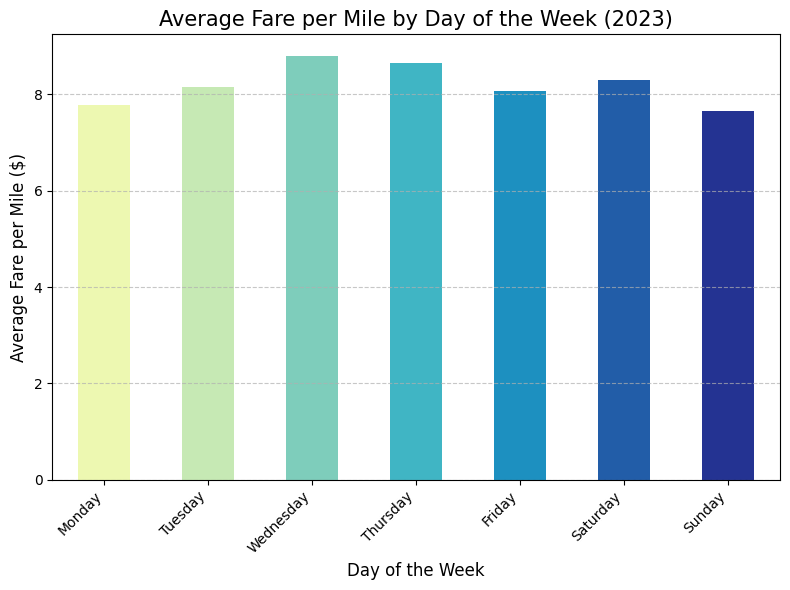


--- Average Fare per Mile by Day of the Week ---
pickup_day_name
Monday       7.78
Tuesday      8.14
Wednesday    8.80
Thursday     8.65
Friday       8.07
Saturday     8.30
Sunday       7.66
Name: fare_per_mile, dtype: float64


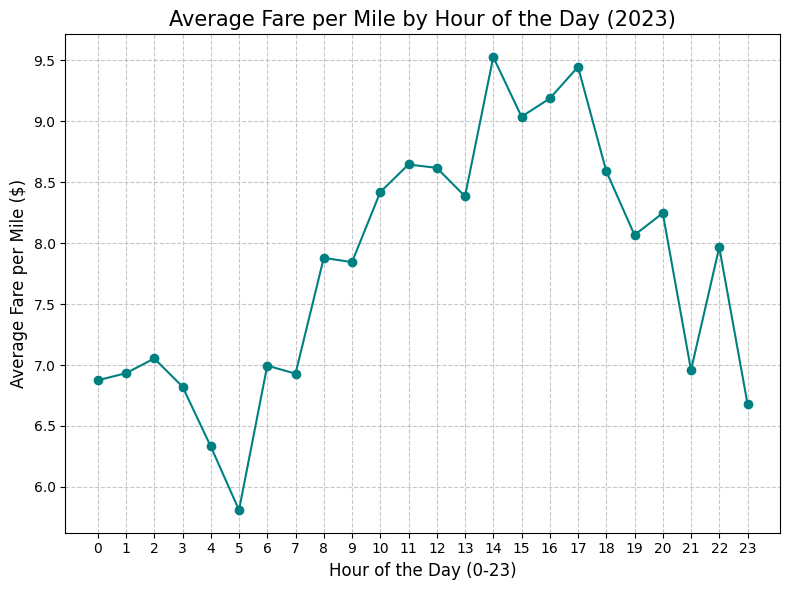


--- Average Fare per Mile by Hour of the Day ---
pickup_hour
0     6.87
1     6.93
2     7.05
3     6.82
4     6.33
5     5.81
6     6.99
7     6.93
8     7.88
9     7.84
10    8.42
11    8.64
12    8.62
13    8.38
14    9.53
15    9.04
16    9.19
17    9.44
18    8.59
19    8.07
20    8.25
21    6.96
22    7.97
23    6.68
Name: fare_per_mile, dtype: float64


In [113]:
# Compare the average fare per mile for different days and for different times of the day

# Analysis by Day of the Week
avg_fare_per_mile_daily = df.groupby('pickup_day_name')['fare_per_mile'].mean()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_fare_per_mile_daily = avg_fare_per_mile_daily.reindex(day_order, fill_value=np.nan)

plt.figure(figsize=(8, 6))
avg_fare_per_mile_daily.plot(kind='bar', color=sns.color_palette('YlGnBu', len(avg_fare_per_mile_daily)))
plt.title('Average Fare per Mile by Day of the Week (2023)', fontsize=15)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Fare per Mile ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\n--- Average Fare per Mile by Day of the Week ---")
print(avg_fare_per_mile_daily.round(2))

# Analysis by Hour of the Day
avg_fare_per_mile_hourly = df.groupby('pickup_hour')['fare_per_mile'].mean()

plt.figure(figsize=(8, 6))
avg_fare_per_mile_hourly.plot(kind='line', marker='o', color='teal')
plt.title('Average Fare per Mile by Hour of the Day (2023)', fontsize=15)
plt.xlabel('Hour of the Day (0-23)', fontsize=12)
plt.ylabel('Average Fare per Mile ($)', fontsize=12)
plt.xticks(ticks=range(24), labels=[str(i) for i in range(24)], rotation=0)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\n--- Average Fare per Mile by Hour of the Day ---")
print(avg_fare_per_mile_hourly.round(2))


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [114]:
# Compare fare per mile for different vendors
df.groupby('VendorID')['fare_per_mile'].mean()

,fare_per_mile
VendorID,
1,7.756016
2,8.390816


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [115]:
# Defining distance tiers
distance_tiers = [0, 2, 5, float('inf')]
tier_labels = ['0-2 miles', '2-5 miles', '5+ miles']

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [116]:
#  Analyze tip percentages based on distances, passenger counts and pickup times



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [117]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [118]:
# See how passenger count varies across hours and days


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [119]:
# How does passenger count vary across zones



In [120]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [121]:
# How often is each surcharge applied?



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

*Insight 1*: Analysis of slowest routes identified specific zone pairs (e.g., between Location IDs 236 & 237) and times (e.g., evening rush hours 5-7 PM) with consistently low average speeds (5-12 mph), even with high trip counts (50-100+).

- Recommendation: Develop dynamic routing suggestions for drivers that highlight these known hourly bottlenecks, potentially suggesting alternative paths if available or providing more accurate time estimates for these congested segments.

*Insight 2*: The heatmap and hourly trend analysis showed distinct peak periods for overall demand (e.g., 5-7 PM weekdays).

- Recommendation: Dispatch systems should proactively increase vehicle allocation towards high-demand origin zones (identified in geographical analysis) just before and during these system-wide peak hours to reduce passenger wait times.

*Insight 3*: Average fare per mile (and thus likely congestion) peaks mid-day (around 2 PM) and during evening rush hours.

- Recommendation: For pre-booked trips, dispatch algorithms could factor in these time-dependent congestion levels (higher fare per mile implies slower travel) to provide more accurate ETAs and potentially suggest slightly earlier or later travel times to customers if feasible.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

*Insight 1*: JFK Airport (ID 132), LaGuardia Airport (ID 138), and key Manhattan zones (Midtown zones like 161, 162, 186, 230; Upper East Side zones 236, 237) were consistently top pickup locations.

- Recommendation: Ensure a higher density of available cabs in these primary pickup zones, especially leading into and during their respective peak activity times (e.g., airports for arrival/departure waves, business districts for commute times).

*Insight 2*: Night hours (11 PM - 5 AM) showed specific pickup hotspots like East Village (ID 79), West Village (ID 249), and JFK Airport (ID 132).

- Recommendation: Strategically guide or incentivize drivers to cover these specific nightlife areas and airports during late-night/early-morning hours to meet localized demand.

*Insight 3*: Pickup-to-dropoff ratio analysis identified airports and transit hubs as strong "origin" zones.

- Recommendation: Maintain a ready pool of taxis at airports and major transit hubs (like Penn Station) as passengers arriving via other modes will frequently seek taxis for the next leg of their journey.

*Insight 4*: Monthly trends indicated peak pickup volumes in May and October.

- Recommendation: Plan for potentially higher overall taxi supply or driver incentives during these historically peak months to match increased demand across the city.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

*Insight 1*: Daytime hours (5 AM - 11 PM) generate ~88% of total revenue, while nighttime (11 PM - 5 AM) contributes ~12%. Existing night surcharges acknowledge different operational conditions.

- Recommendation: Evaluate the impact and fairness of current night surcharges against the observed 12% revenue share and specific night-time demand patterns (e.g., high demand in nightlife zones). Ensure it adequately compensates drivers without overly deterring night-time ridership.

*Insight 2*: The average fare per mile significantly increases during peak congestion hours (e.g., weekday midday around 2 PM and evening rush 5-7 PM, reaching ~$9.50/mile) and on high-congestion days (Wednesday/Thursday showing the highest average fare per mile).

- Recommendation: While base metered rates are regulated, this data strongly supports the rationale behind existing peak-hour surcharges. Consider if the current surcharge levels accurately reflect the significantly higher operational cost (due to time) per mile during these specific "hottest" congestion periods. Any adjustments should aim to balance driver compensation for lost time with passenger price sensitivity.

*Insight 3*: Passenger count does not affect the base fare but significantly reduces the fare per mile per passenger.

- Recommendation: While not a direct pricing strategy for the meter, highlight the cost-effectiveness of shared rides (more passengers) in marketing or app features. This can attract groups and improve vehicle utilization without altering regulated fares.

*Insight 4*: Certain short, high-demand routes (e.g., between zones 236 & 237) are consistently very slow (5-12 mph), meaning the time component of the fare is high relative to distance.

- Recommendation: For these specific, reliably identified, chronically congested short routes, explore if a slightly different fare calculation (if permissible by TLC regulations and transparent to customers) could better reflect the operational difficulty, or use this data to advocate for localized traffic improvements that would benefit both drivers (faster turnaround) and passengers (fairer fares for short but slow trips). This is a more complex suggestion requiring regulatory consideration.